# Import library, load data

In [1]:
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from __future__ import print_function
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,classification_report
from scipy.stats import norm, beta
import random as rand
from sklearn import metrics
from sklearn.preprocessing import *
from pandas import DataFrame
import os
import functools as ft
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

plt.style.use('seaborn-poster')
np.set_printoptions(precision=2)  # 2 digits after .

%matplotlib inline


# define path
HOME_DATA_PATH = "./data/property.csv"
USER_ACTIVITY_PATH = "./data/user_activity.csv"
USER_ITEM_POINT_PATH = "./data/user_item_point.csv"


/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_67352/204434907.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


# Inspecting User's activities data

In [2]:
# display user's activities history data
activities = pd.read_csv(USER_ACTIVITY_PATH)
activities.head()


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,sent_catalog_link,2020-02-04 20:19:00.110416
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
4,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646


In [3]:
activities.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323893 entries, 0 to 323892
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   item_id           323893 non-null  object
 1   user_id           323893 non-null  object
 2   event_type        323893 non-null  object
 3   create_timestamp  323893 non-null  object
dtypes: object(4)
memory usage: 9.9+ MB


# Inspecting homes data

In [4]:
# display homes data
homes = pd.read_csv(HOME_DATA_PATH)
home_orig = homes.copy()

homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,edbfd412-0bf6-46ec-82b7-2fb66be1c160,432000000.0,3600000,03331262-b194-4c33-93c8-36b2c34129c8,NaN,221,False,3.0,1.0,True,25.0
1,59d267bc-3812-4067-bcf4-478592386048,396000000.0,0,0a698943-b70c-43b7-aabd-15de1f43d392,3.0,147,True,NaN,4.0,False,0.0
2,06992860-08bb-4279-b8bb-92e27b8cc139,396000000.0,720000,ebce2524-e75b-4b02-861a-d310f5395e5d,NaN,126,True,4.0,3.0,True,8.0
3,0bbc1bb8-0d67-426d-916e-4385927cd3e7,360000000.0,0,3407b7ba-a275-4ab7-bc13-28b08a54c028,2.0,139,False,3.0,2.0,True,9.0
4,cd2426c9-cee1-4c26-9b00-2f7b3d1d858d,360000000.0,72000,ceeac06a-a89d-4934-98a8-e6183ef0a0e9,3.0,160,True,5.0,2.0,True,0.0


In [5]:
homes.describe()


,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.925000e+03,4.930000e+03,4863.000000,4930.000000,3282.000000,4893.000000,4926.000000
mean,8.321284e+07,1.052041e+06,1.462472,71.653347,3.970750,2.417127,13.651035
std,5.289941e+07,3.797125e+06,0.575608,22.890889,1.280667,3.496221,8.483931
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.000000,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,4.000000,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


In [6]:
homes.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4863 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


# Visualize Missing Value

In [7]:
# visualize missing value
missing_stats = {}
for col in homes.columns:
    if col =="item_id":
        continue
    missing_data_count = homes[col].isna().sum()
    missing_percent = round(missing_data_count/len(homes)*100, 2)
    missing_stats[col] = {
        "percent": missing_percent,
        "count": missing_data_count
    }
    display(
        f"Column {col}: has {missing_percent}% missing data with {missing_data_count} missing entries")


'Column deposit: has 0.1% missing data with 5 missing entries'

'Column monthly_rent: has 0.0% missing data with 0 missing entries'

'Column district_uuid: has 0.02% missing data with 1 missing entries'

'Column room_qty: has 1.36% missing data with 67 missing entries'

'Column unit_area: has 0.0% missing data with 0 missing entries'

'Column has_elevator: has 0.34% missing data with 17 missing entries'

'Column building_floor_count: has 33.43% missing data with 1648 missing entries'

'Column unit_floor: has 0.75% missing data with 37 missing entries'

'Column has_storage_area: has 0.2% missing data with 10 missing entries'

'Column property_age: has 0.08% missing data with 4 missing entries'

Text(0.5, 1.0, 'Missing value count by column')

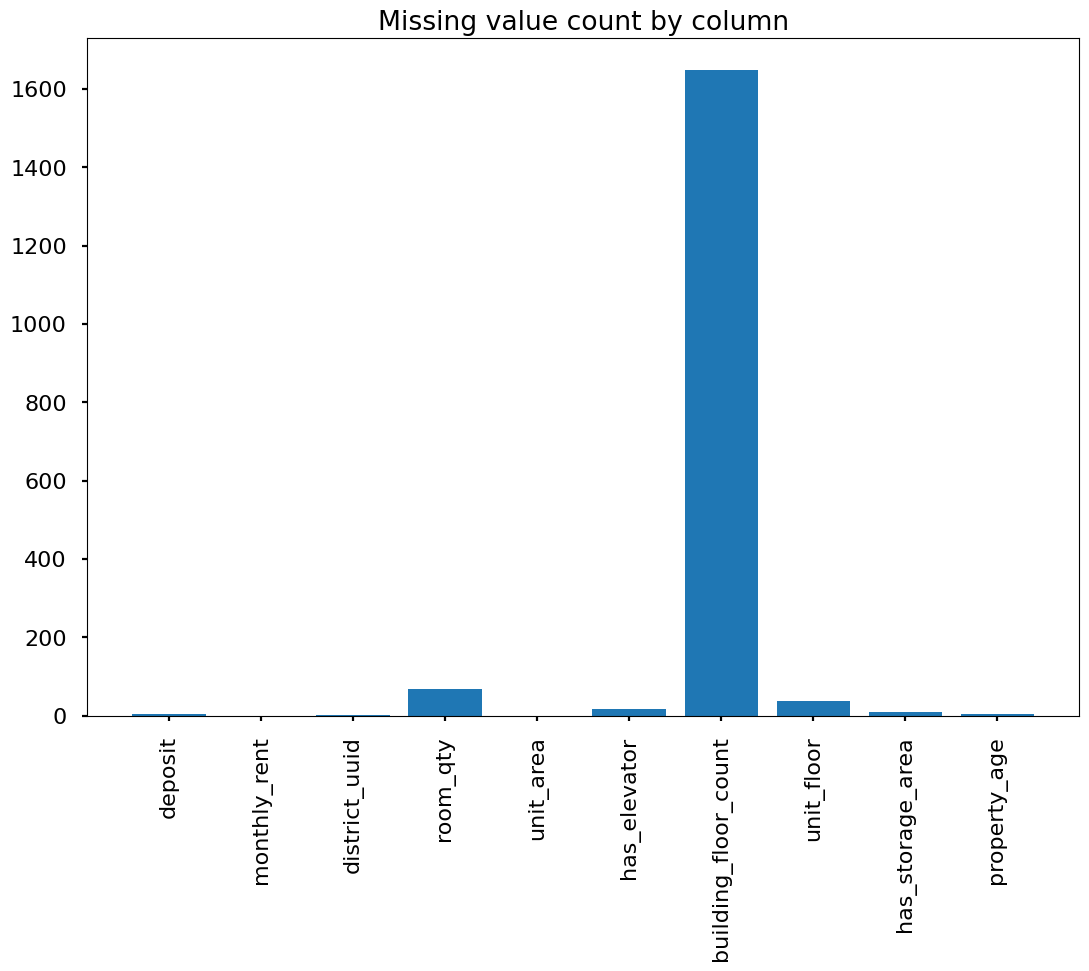

In [8]:
missing_x=missing_stats.keys()
missing_y_count=[x["count"] for x in missing_stats.values()]
missing_y_percent=[x["percent"] for x in missing_stats.values()]
plt.xticks(rotation=90)
plt.bar(x=missing_x,height=missing_y_count)
plt.title("Missing value count by column")


Text(0.5, 1.0, 'Missing value percentage by column')

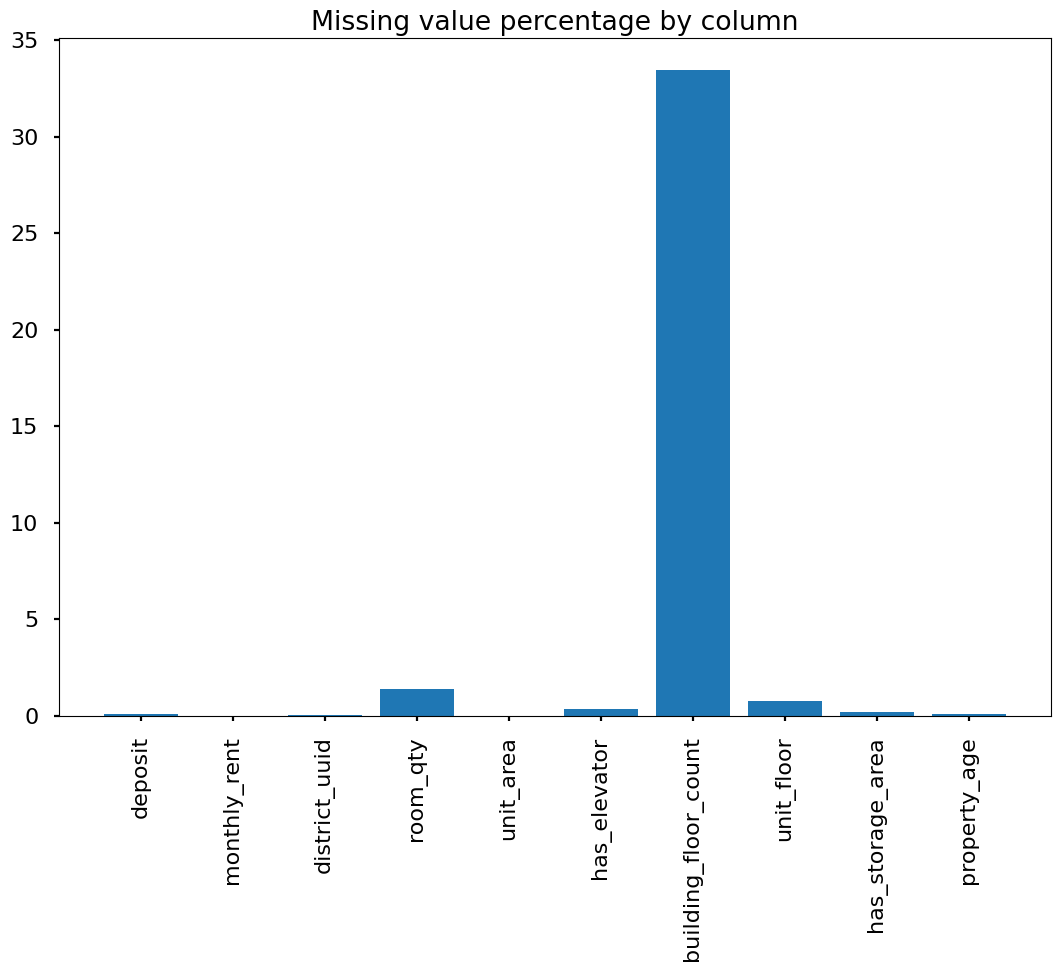

In [9]:
plt.xticks(rotation=90)

plt.bar(x=missing_x,height=missing_y_percent)
plt.title("Missing value percentage by column")


<AxesSubplot: >

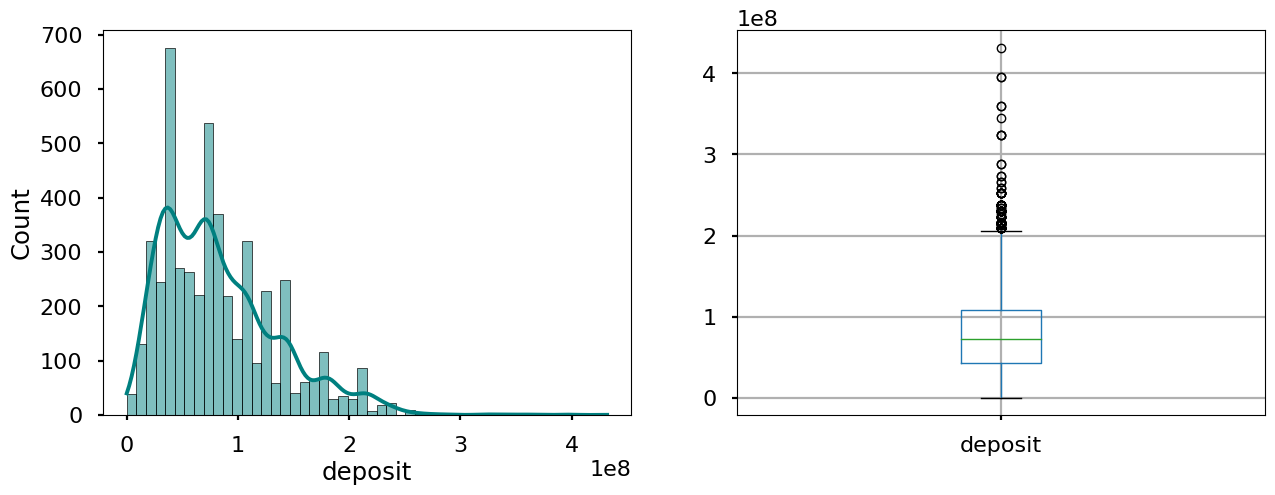

In [10]:
"""visualize deposit"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
deposit_data=homes[homes.deposit>0].deposit
sns.histplot(deposit_data, color='teal', kde=True, bins=50,ax=axes[0])
deposit_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

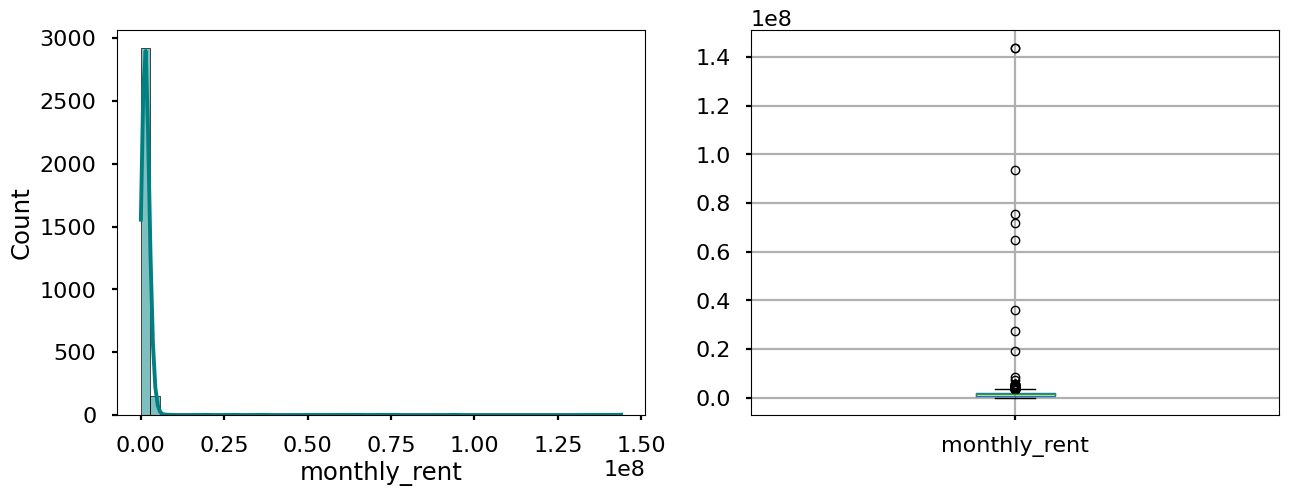

In [11]:
"""visualize monthly rent"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
monthly_rent_data=homes[homes.monthly_rent>0].monthly_rent
sns.histplot(monthly_rent_data, color='teal', kde=True, bins=50,ax=axes[0])
monthly_rent_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

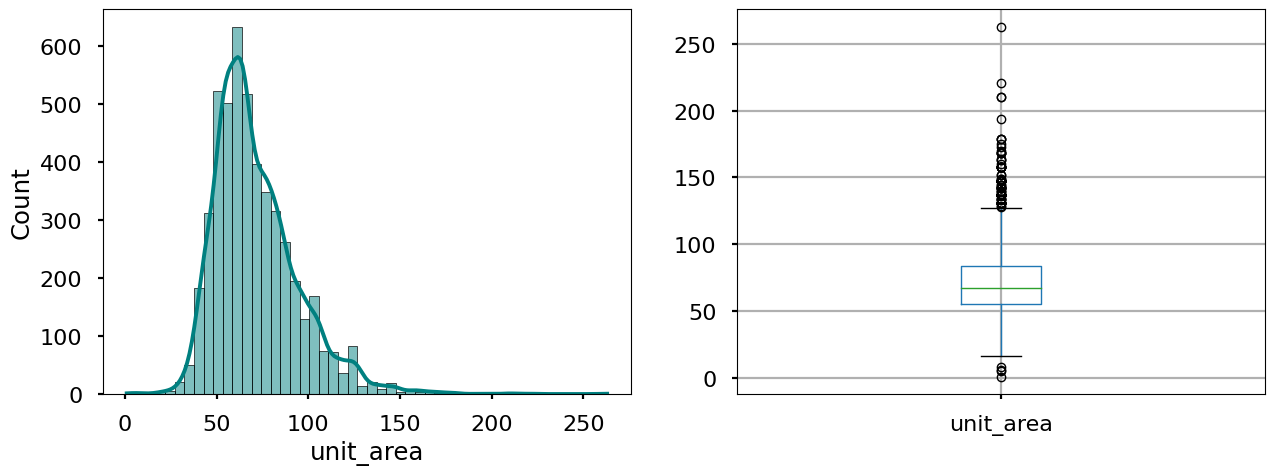

In [12]:
"""visualize unit area"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
unit_area_data=homes[homes.unit_area>0].unit_area
sns.histplot(unit_area_data, color='teal', kde=True, bins=50,ax=axes[0])
unit_area_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

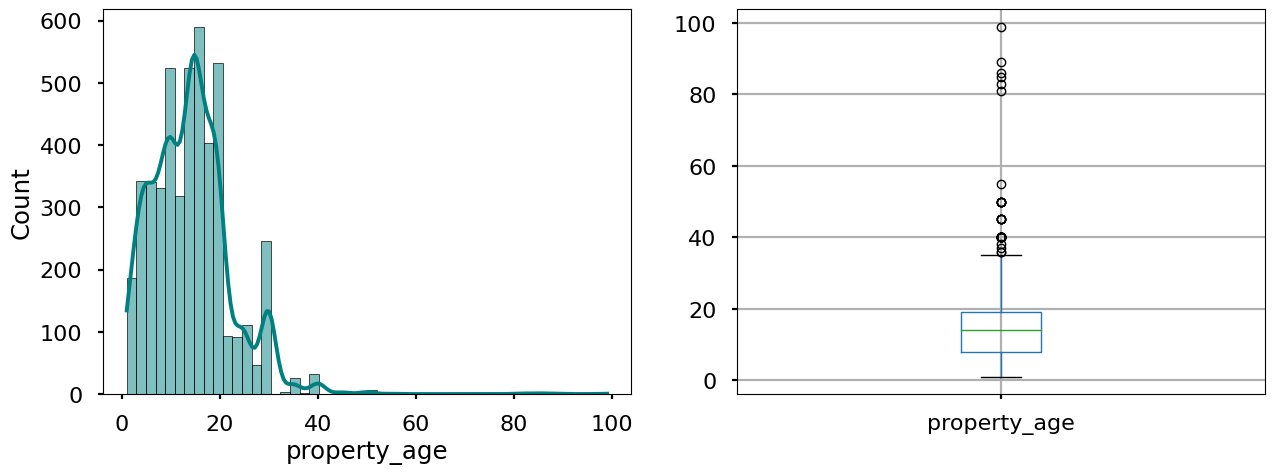

In [13]:
"""visualize property age"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
property_age_data=homes[homes.property_age>0].property_age
sns.histplot(property_age_data, color='teal', kde=True, bins=50,ax=axes[0])
property_age_data.to_frame().boxplot(vert=True,ax=axes[1])

/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_67352/3784418622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=homes.corr()


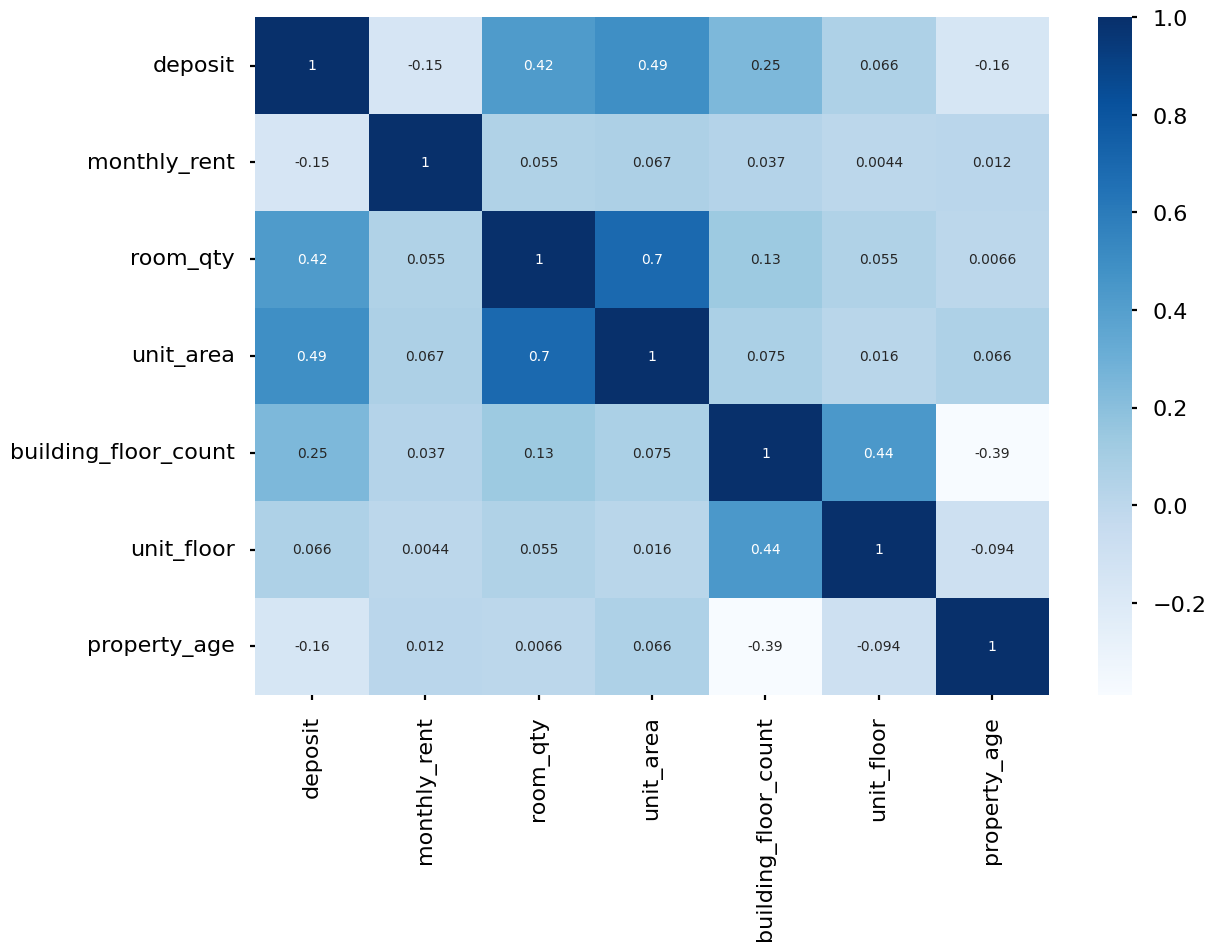

In [14]:
correlation=homes.corr()
sns.heatmap(data=correlation,annot=True,cmap="Blues")
plt.show()

## Predict missing room_qty from unit_area

In [15]:
rqty_train_home=homes.copy()
rqty_train_home=rqty_train_home[rqty_train_home["unit_area"].notna()]
rqty_train_home=rqty_train_home[rqty_train_home["room_qty"].notna()]
data = rqty_train_home[['room_qty','unit_area']]

X = data[['unit_area']]
y = data[['room_qty']]
encoder =LabelEncoder()

print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

y_test=encoder.fit_transform(y_test)

y_train = encoder.fit_transform(y_train)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

/opt/homebrew/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      room_qty
1          3.0
3          2.0
4          3.0
6          2.0
7          3.0
...        ...
4924       2.0
4925       1.0
4926       1.0
4927       1.0
4929       2.0

[4863 rows x 1 columns]
              precision    recall  f1-score   support

           0       0.14      0.44      0.22         9
           1       0.86      0.83      0.85       803
           2       0.79      0.79      0.79       625
           3       0.23      0.32      0.26        22
           4       0.00      0.00      0.00         0

    accuracy                           0.80      1459
   macro avg       0.40      0.48      0.42      1459
weighted avg       0.82      0.80      0.81      1459



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
def predict_room(area : int):
  predicted_value = model.predict([[area]])
  result=int(encoder.inverse_transform(predicted_value)[0])
  print(f"predicted room qty {result}")
  return result

In [17]:
"""predict missing room_qty"""
na_roomqty_index=np.where(homes["room_qty"].isna())[0]

for i in na_roomqty_index:
    it_unit_area=homes.iloc[i]["unit_area"]
    if it_unit_area==None:
        continue
    homes.at[i,"room_qty"]=predict_room(it_unit_area)

homes[homes["room_qty"].isna()]

predicted room qty 3
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 1
predicted room qty 2
predicted room qty 2
predicted room qty 3
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 2
predicted room qty 1
predicted roo

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:4

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age


## Santinize data

In [18]:
# sanitize data
homes.drop(list(homes[homes.unit_area <=0].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.shape
homes.head()
orig_item_ids = homes["item_id"].values



In [19]:
cats = ['district_uuid', 'has_elevator', 'has_storage_area']

for c in cats:
    le = LabelEncoder()
    homes[c] = le.fit_transform(homes[c].astype('str'))
 
homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,edbfd412-0bf6-46ec-82b7-2fb66be1c160,432000000.0,3600000,1,3.0,221,0,3.0,1.0,1,25.0
1,59d267bc-3812-4067-bcf4-478592386048,396000000.0,0,7,3.0,147,1,NaN,4.0,0,0.0
2,06992860-08bb-4279-b8bb-92e27b8cc139,396000000.0,720000,145,2.0,126,1,4.0,3.0,1,8.0
3,0bbc1bb8-0d67-426d-916e-4385927cd3e7,360000000.0,0,42,2.0,139,0,3.0,2.0,1,9.0
4,cd2426c9-cee1-4c26-9b00-2f7b3d1d858d,360000000.0,72000,132,3.0,160,1,5.0,2.0,1,0.0


In [20]:
feats = [c for c in homes.columns if c not in ['item_id']]
feats


['deposit',
 'monthly_rent',
 'district_uuid',
 'room_qty',
 'unit_area',
 'has_elevator',
 'building_floor_count',
 'unit_floor',
 'has_storage_area',
 'property_age']

In [21]:

home_orig_cleaned = homes.copy()

del homes['item_id']

homes.fillna(homes.mean(), inplace=True)
rb = StandardScaler()
home = rb.fit_transform(homes)
home = pd.DataFrame(home, columns=feats)
home.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,6.598761,0.670853,-2.078188,2.660309,6.535361,-0.734076,-0.928965,-0.406897,0.717972,1.338159
1,5.917605,-0.277151,-1.942697,2.660309,3.296514,1.322505,0.000000,0.454384,-1.368211,-1.611037
2,5.917605,-0.087550,1.173595,0.922273,2.377382,1.322505,0.028000,0.167290,0.717972,-0.667295
3,5.236449,-0.277151,-1.152333,0.922273,2.946369,-0.734076,-0.928965,-0.119803,0.717972,-0.549327
4,5.236449,-0.258191,0.880031,2.660309,3.865501,1.322505,0.984965,-0.119803,0.717972,-1.611037


In [22]:


# remove rows that contains unused event
unused_events = [
    "seen_in_list",
    "suggest-new",
    "suggest_similar",
    "sent_catalog_link",
    # "visit_request-canceled",
    # "visit-canceled",
    # "meeting_request-canceled",
    # "meeting-canceled"
]

for event in unused_events:
    indexRows = activities[activities.event_type.str.contains(event)].index
    activities.drop(indexRows, inplace=True)
    activities.reset_index(drop=True, inplace=True)
display(activities.head())
#


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646
4,00062bc5-2535-4b1e-bbcb-228526c990b8,69c257cd-8033-82aa-8950-8804a03c2ed1,seen,2020-02-05 10:18:54.229749


In [23]:



def assign_weight():
    # assign weight to events
    events_weight={
    "seen":20,
    "visit_request-new":30,
    "visit-new":30,
    "visit-unsuccess":-10,
    "visit-success":50,
    "meeting_request-new":70,
    "meeting-new":70,
    "meeting-unsuccess":70,
    "meeting-success":100,
    "deal-success":100,
    "visit_request-canceled":-10,
    "visit-canceled":-15,
    "meeting_request-canceled":-30,
    "meeting-canceled":-40,
    }
    users_items_points={}

    for _, activity in activities.iterrows():
        user_id=activity.user_id
        item_id=activity.item_id
        event_type=activity.event_type
        key=user_id+"-"+item_id
        if users_items_points.get(key)==None: 
            users_items_points[key]={
               "user_id": user_id,
                "item_id":item_id,
                "points":0
            }
         
        users_items_points[key]["points"]+=events_weight[event_type]
    
    pointDf= DataFrame(users_items_points.values())

    pointDf.to_csv(USER_ITEM_POINT_PATH,index=False)

if not os.path.isfile(USER_ITEM_POINT_PATH):
    assign_weight()

pointDf=pd.read_csv(USER_ITEM_POINT_PATH)
display(pointDf.head(5))





,user_id,item_id,points
0,182aa519-83a8-848f-84a1-8697046d84c2,00062bc5-2535-4b1e-bbcb-228526c990b8,20
1,189a081a-ae0f-499d-9092-01758d93fa7f,00062bc5-2535-4b1e-bbcb-228526c990b8,40
2,69c257cd-8033-82aa-8950-8804a03c2ed1,00062bc5-2535-4b1e-bbcb-228526c990b8,20
3,054f4d81-ee93-407c-af31-ff84c3a103a8,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20
4,08a44ae5-8419-88dd-8c61-8a9cd391677c,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20


<AxesSubplot: xlabel='deposit', ylabel='room_qty'>

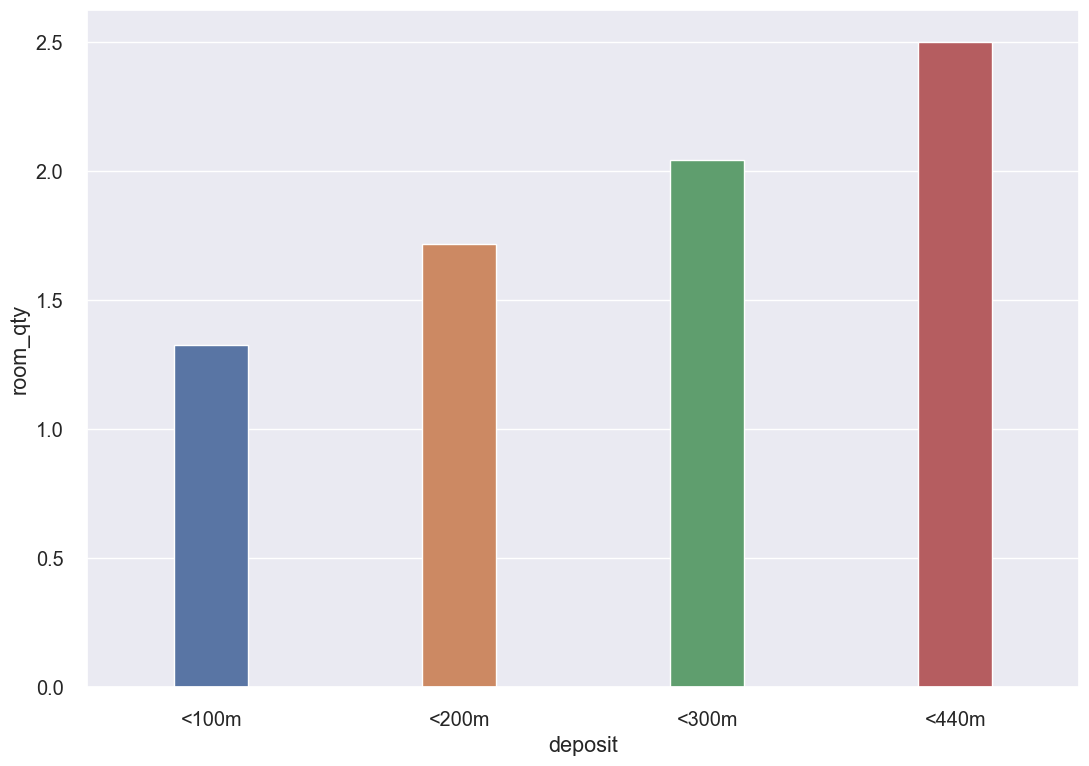

In [97]:
"""deposit - room_qty relationship	"""

bins=[0,100000000,200000000,300000000,440000000]
x=pd.cut(x=home_orig.deposit,bins=bins,labels=["<100m","<200m","<300m","<440m"])
deposit_room=home_orig.groupby(x)["room_qty"].mean().reset_index()
sns.barplot(x=deposit_room.deposit,y=deposit_room.room_qty,width=0.3)


<AxesSubplot: xlabel='deposit', ylabel='unit_area'>

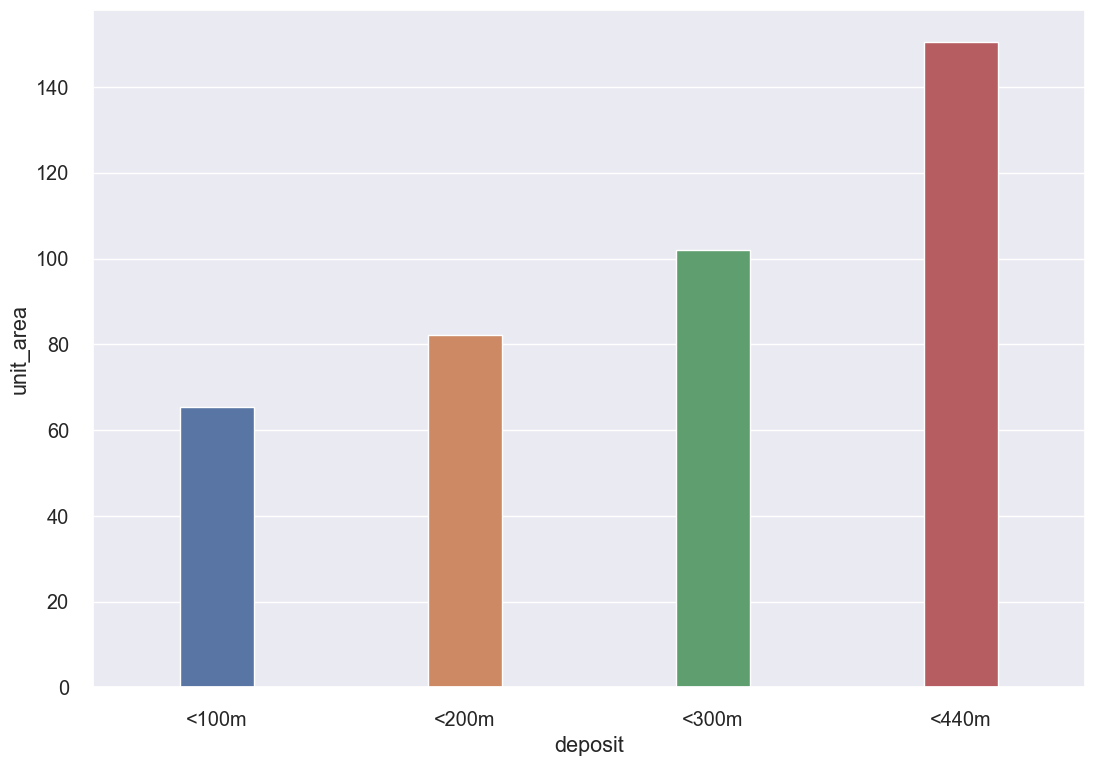

In [98]:
"""deposit - unit_area relationship	"""

bins=[0,100000000,200000000,300000000,440000000]
x=pd.cut(x=home_orig.deposit,bins=bins,labels=["<100m","<200m","<300m","<440m"])
deposit_room=home_orig.groupby(x)["unit_area"].mean().reset_index()
sns.barplot(x=deposit_room.deposit,y=deposit_room.unit_area,width=0.3)


<AxesSubplot: xlabel='unit_area', ylabel='room_qty'>

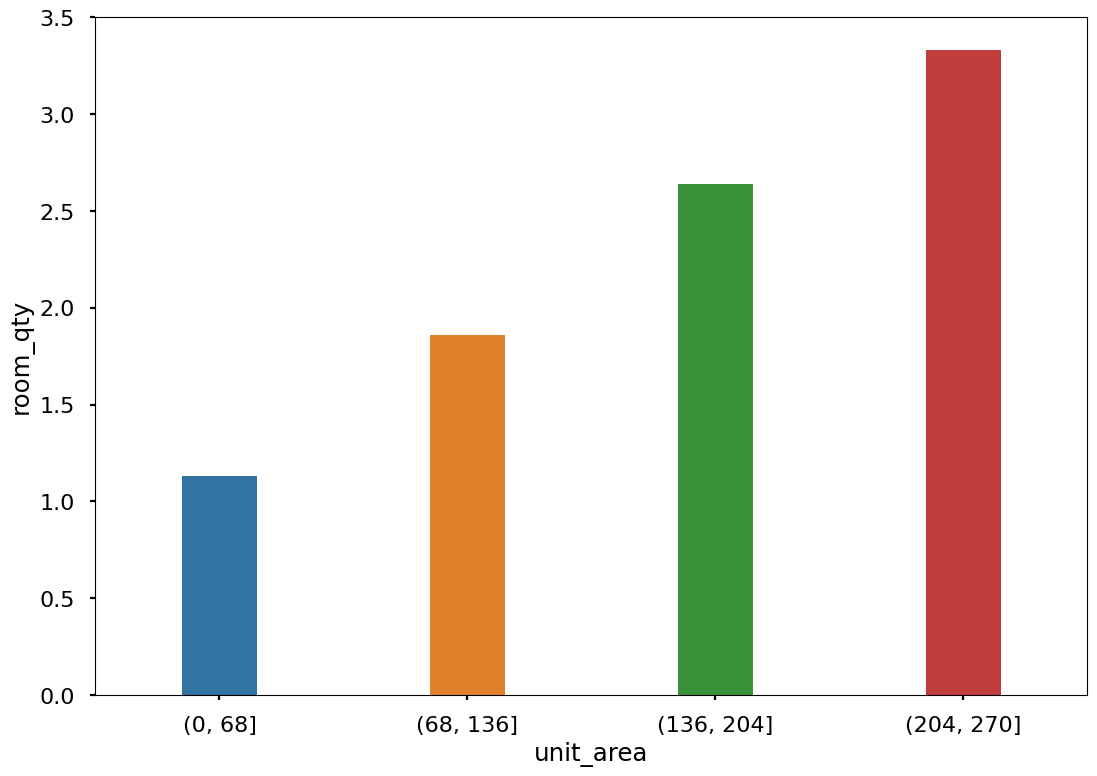

In [26]:
"""unit_area - room_qty relationship	"""

bins=[0,68,68*2,68*3,270]
x=pd.cut(x=home_orig.unit_area,bins=bins)
deposit_room=home_orig.groupby(x)["room_qty"].mean().reset_index()
sns.barplot(x=deposit_room.unit_area,y=deposit_room.room_qty,width=0.3)


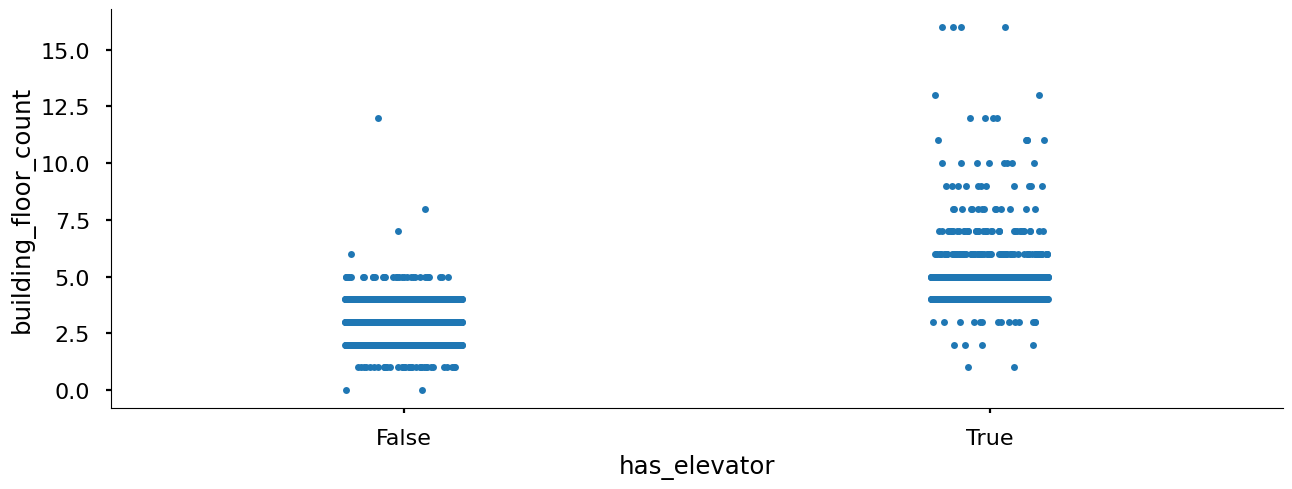

In [27]:
"""building floor count - has elevator relationship	"""
bfc_he=home_orig[["has_elevator","building_floor_count"]]
bfc_he=bfc_he.dropna()
g=sns.catplot(data=bfc_he,x="has_elevator",y="building_floor_count")
g.fig.set_size_inches(15,5)


In [28]:
"""find and remove invalid items"""
item_ids = np.unique(np.array(pointDf.item_id.values))

invalid_item_ids = [x for x in item_ids if x not in orig_item_ids]


print(f"found {len(invalid_item_ids)} ids that are not in property data")


pointDf.drop(pointDf[pointDf.item_id.isin(
    invalid_item_ids)].index, inplace=True)
pointDf.reset_index(drop=True, inplace=True)

# display(orig_item_ids)
# display(home_orig[np.where(home_orig.item_id.isin(item_ids)==False)])


found 2 ids that are not in property data


In [29]:
point_matrix = pointDf.values

user_id_nums={}
user_id_nums_rev={}
item_id_nums={}
item_id_nums_rev={}
for index,row in list(enumerate(point_matrix)):
    user_id=row[0]
    item_id=row[1]
    point=row[2]
    if user_id_nums.get(user_id) ==None:
        user_id_nums[user_id]=len(user_id_nums.keys())
        user_id_nums_rev[user_id_nums[user_id]]=user_id
    if item_id_nums.get(item_id) ==None:
        item_id_nums[item_id]=len(item_id_nums.keys())
        item_id_nums_rev[item_id_nums[item_id]]=item_id
        
points_train, points_test = train_test_split(point_matrix, test_size=0.2)
print(points_train.shape)
print(points_test.shape)


(76998, 3)
(19250, 3)


In [30]:
input_cols = ["deposit", "monthly_rent", "room_qty", "unit_area", "has_elevator",
              "build_floor_count", "unit_floor", "has_storage", "property_age"]
homes.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,432000000.0,3600000,1,3.0,221,0,3.000000,1.0,1,25.0
1,396000000.0,0,7,3.0,147,1,3.970741,4.0,0,0.0
2,396000000.0,720000,145,2.0,126,1,4.000000,3.0,1,8.0
3,360000000.0,0,42,2.0,139,0,3.000000,2.0,1,9.0
4,360000000.0,72000,132,3.0,160,1,5.000000,2.0,1,0.0


/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_67352/3531023241.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x=top_prop["item_id"][:10]
/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_67352/3531023241.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y=top_prop["count"][:10]


Text(0.5, 0, 'Item id')

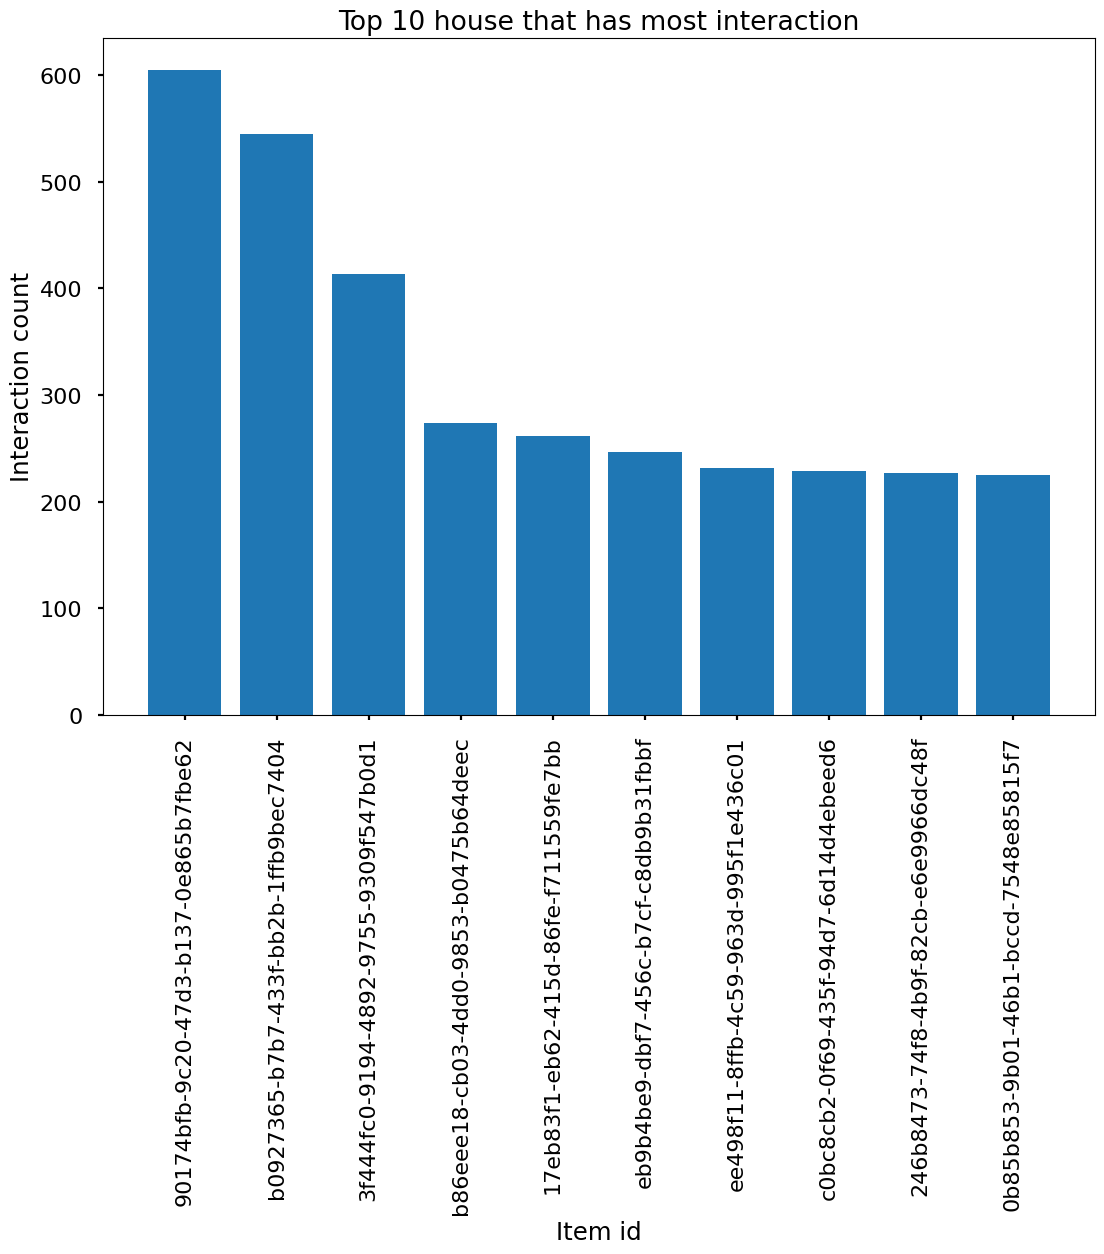

In [31]:
"""visualize top 10 house has most interaction"""
top_prop=pointDf.groupby("item_id")["points"].count().reset_index(name="count")
top_prop=top_prop.sort_values("count",ascending=False)
x=top_prop["item_id"][:10]
y=top_prop["count"][:10]
plt.xticks(rotation=90)
plt.bar(x=x,height=y)
plt.title("Top 10 house that has most interaction")
plt.ylabel("Interaction count")
plt.xlabel("Item id")



/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_67352/3343783033.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x=top_user["user_id"][:10]
/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_67352/3343783033.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y=top_user["count"][:10]


Text(0.5, 0, 'user id')

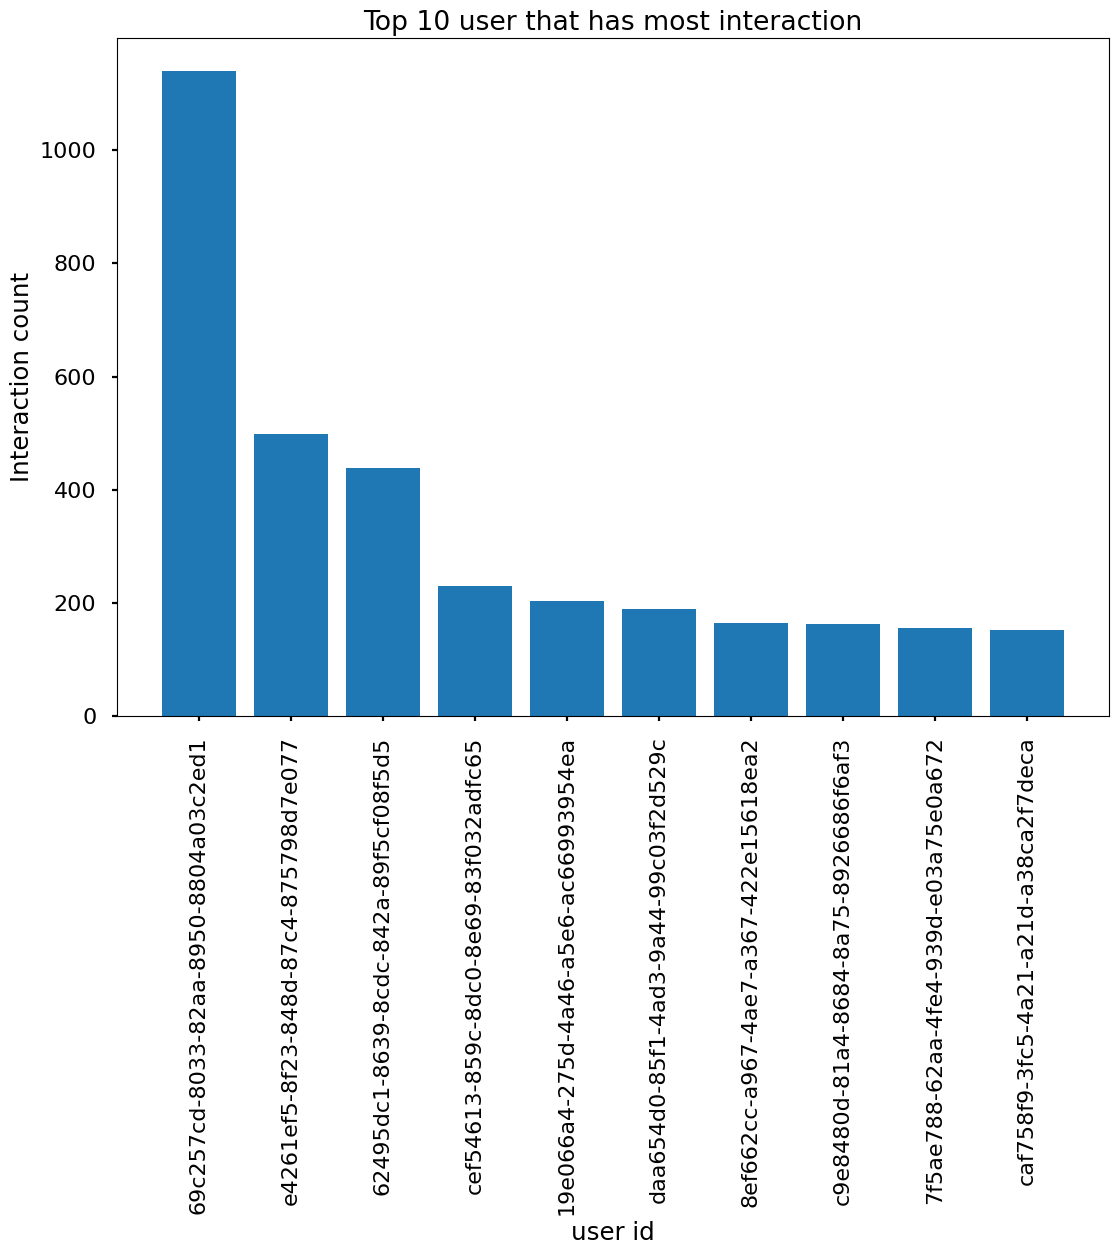

In [32]:
"""visualize top 10 user has most interaction"""
top_user=pointDf.groupby("user_id")["points"].count().reset_index(name="count")
top_user=top_user.sort_values("count",ascending=False)
x=top_user["user_id"][:10]
y=top_user["count"][:10]
plt.xticks(rotation=90)
plt.bar(x=x,height=y)
plt.title("Top 10 user that has most interaction")
plt.ylabel("Interaction count")
plt.xlabel("user id")



In [33]:
def get_items_point_by_user(point_matrix, user_id):
    "all user id"
    y = point_matrix[:, 0]
    # get rows where user_id == input user_id
    filtered = point_matrix[np.where(y == user_id)]
    item_ids = filtered[:, 1].flatten()
    points = filtered[:, 2].flatten()
    return (item_ids, points)


# Content-based filtering

## Decision Tree Approach

### Train decision tree

In [34]:

users=point_matrix[:,0]
mu = np.zeros((len(users),))
normalized_points=point_matrix.copy()
for n in users:            # row indices of ratings made by user n
   ids = np.where(users == n)[0]
   item_points =point_matrix[ids, 2]
   # avoid zero division
   uid_numeric=user_id_nums[n]
   mu[uid_numeric] = np.mean(item_points) if ids.size > 0 else 0
   normalized_points[ids, 2] = item_points - mu[uid_numeric]


In [35]:

unique_user_id_train = np.unique(points_train[:, 0])
unique_user_id_test = np.unique(points_test[:, 0])

n_users = len(unique_user_id_train)
dt_trained_models={}
threshold=0
for uid in unique_user_id_train:
    ids, points = get_items_point_by_user(
        normalized_points,uid)
    clf = DecisionTreeClassifier(max_depth=3,random_state=6)
    Xhat = home[home_orig_cleaned.item_id.isin(ids)]
    if len(Xhat) ==0:
        continue;
    clf.fit(Xhat, points>threshold)    
    dt_trained_models[uid]=clf



### Eval Decision tree

In [36]:
test_lab=[]
test_pred_decision_tree=[]
longest_id=""
longest_id_count=0
for uid in unique_user_id_test:
    #print(f"start training for user: {unique_user_id_train[n]}")
        # uid=56
    ids, points = get_items_point_by_user(points_test, uid)
    
    if len(ids)>longest_id_count:
        longest_id_count=len(ids)
        longest_id=uid

    # x_test_dt=home[home_orig.item_id.isin(ids)]
    if dt_trained_models.get(uid) == None:
        continue
    selected_model=dt_trained_models[uid]
    predicted=selected_model.predict(home[home_orig_cleaned.item_id.isin(ids)])
    test_lab.extend(predicted)
    test_pred_decision_tree.extend(points>threshold)

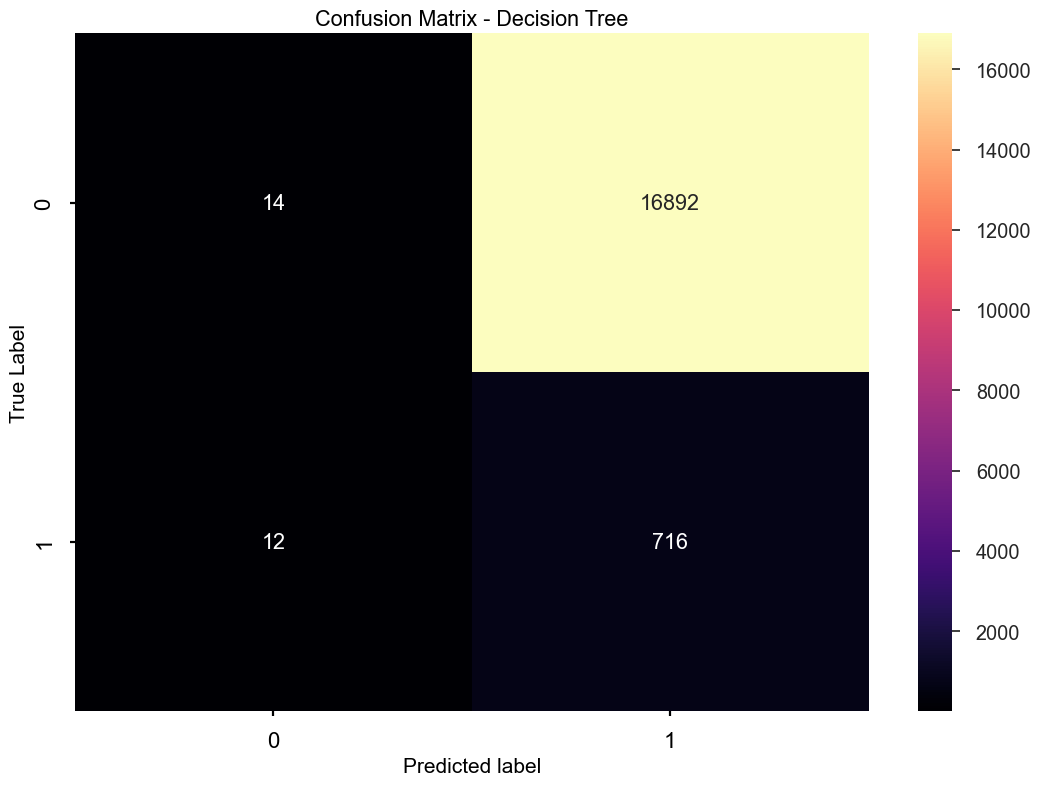

<Figure size 1000x700 with 0 Axes>

In [37]:

labels=["not like","like"]
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
# ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
# ax.set_yticklab/els(list(labels), rotation = 0)
plt.show()

In [38]:
print(metrics.classification_report(test_lab,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

       False       0.54      0.00      0.00     16906
        True       0.04      0.98      0.08       728

    accuracy                           0.04     17634
   macro avg       0.29      0.49      0.04     17634
weighted avg       0.52      0.04      0.00     17634



In [39]:
uid=unique_user_id_train[rand.randint(0,len(unique_user_id_train)-1)]
#40c034e8-032a-4f88-a684-26d85cc28e19

print(uid)
ids, points = get_items_point_by_user(points_test, uid)


# x_test_dt=home[home_orig.item_id.isin(ids)]

selected_model=dt_trained_models[uid]
predicted=selected_model.predict(home)
home_orig_cleaned[predicted].head(10)

56a1a585-4640-44a1-ac60-dac74187a2df


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age


## Ridge Regression Approach

In [40]:
"""train ridge model"""



unique_user_id_train = np.unique(points_train[:, 0])

n_users = len(unique_user_id_train)

d = home.shape[1]  
W = np.zeros((d, n_users))
b = np.zeros((1, n_users))

for n in range(n_users):
    ids, points = get_items_point_by_user(
        points_train, unique_user_id_train[n])

    clf = Ridge(alpha=0.01, fit_intercept=True)
    Xhat = home[home_orig_cleaned.item_id.isin(ids)]
    clf.fit(Xhat, points)
    trained_weight = clf.coef_
    trained_b = clf.intercept_
    W[:, n] = trained_weight
    b[0, n] = trained_b



In [41]:
#cols: users
#rows: houses
# value: predicted point
Yhat = np.array(home.dot(W) + b)
print(Yhat.shape)
print(home.shape)
print(W.shape)


(4928, 15391)
(4928, 10)
(10, 15391)


In [43]:
unique_user_id_test = np.unique(points_test[:, 0])

cb_real_points=np.array([],dtype="float64")
cb_pred_points=np.array([],dtype="float64")
for i in range(len(unique_user_id_test)-1):
    n = i
    ids, points = get_items_point_by_user(points_test, unique_user_id_test[n])
    id_indexs = home[home_orig_cleaned.item_id.isin(ids)].index.tolist()
    cb_pred_points=np.append(cb_pred_points,Yhat[id_indexs, n])
    cb_real_points=np.append(cb_real_points,points)
CB_RMSE=metrics.mean_squared_error(
            cb_pred_points,cb_real_points, squared=False)
CB_MSE=metrics.mean_squared_error(
            cb_pred_points,cb_real_points, squared=True)
CB_MAE=mean_absolute_error(cb_pred_points,cb_real_points)


print('Content-based Filtering RMSE: ',CB_RMSE,)
print('Content-based Filtering MSE: ', CB_MSE,)
print('Content-based Filtering MAE: ', CB_MAE)



Content-based Filtering RMSE:  42.74123020395904
Content-based Filtering MSE:  1826.8127593478205
Content-based Filtering MAE:  8.257295582290363


In [84]:
def visualize_differences(pred_points,real_points,fig=None,num_visualization=1000,title=None):
    x_axis_ticks=[x for x in range(num_visualization)]
    show=fig==None
    if fig==None:
        fig=plt
    fig.plot(x_axis_ticks,pred_points[:num_visualization],label="Predicted")
    fig.plot(x_axis_ticks,real_points[:num_visualization],label="Real")
    fig.legend()
    if title!=None:
        fig.set_title(title)
    if show:
        fig.ylabel("Point")
        fig.xlabel("Case")
        fig.show()
    else:
        fig.set_ylabel("Point")
        fig.set_xlabel("Case")

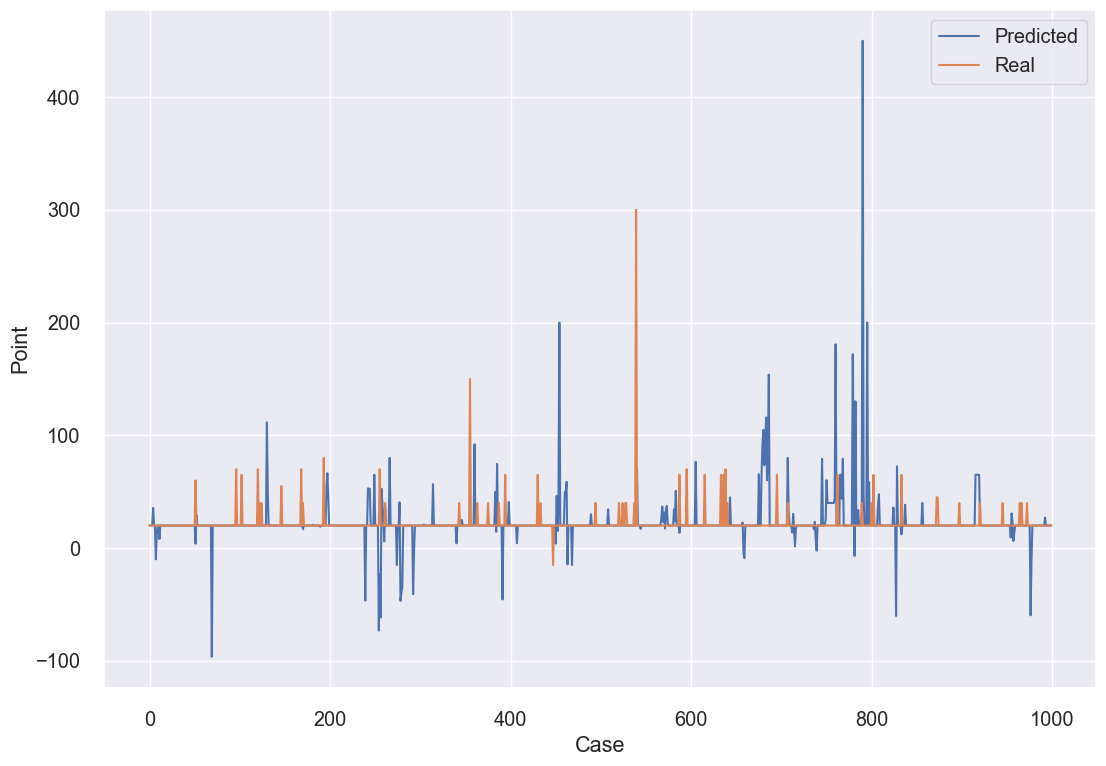

In [45]:
visualize_differences(pred_points=cb_pred_points,real_points=cb_real_points)

# Collaborative filtering

In [47]:



class CollaborativeFiltering(object):
    def __init__(self, Y_data, k, sim_func=cosine_similarity,item_based=False):
        points_copy=Y_data.copy()
        for index,row in list(enumerate(Y_data)):
            point=row[2]
            if not item_based:
                user_id=row[0]
                item_id=row[1]
                points_copy[index]=[user_id_nums[user_id],item_id_nums[item_id],point]      
            else:
                user_id=row[1]
                item_id=row[0]
                points_copy[index]=[item_id_nums[item_id],user_id_nums[user_id],point]      

        self.Y_data = points_copy  # a 2d array of shape (n_users, 3)
        # each row of Y_data has form [user_id, item_id, rating]
        self.k = k  # number of neighborhood
        self.sim_func = sim_func  # similarity function, default: cosine_similarity
        self.Ybar = None  # normalize data
        self.n_users = len(self.Y_data[:,0])  # number of users
        self.n_items = len(self.Y_data[:,1])  # number of items

    def fit(self):

        # normalized Y_data -> Ybar
        users = self.Y_data[:, 0]  # all users - first column of Y_data
        self.Ybar = self.Y_data.copy()
        self.mu = np.zeros((self.n_users,))
        for n in users:
            # row indices of ratings made by user n
            ids = np.where(users == n)[0].astype(np.int32)
            # indices of all items rated by user n
            item_ids = self.Y_data[ids, 1]
            # ratings made by user n
            ratings = self.Y_data[ids, 2]
            # avoid zero division
            self.mu[n] = np.mean(ratings) if ids.size > 0 else 0
            self.Ybar[ids, 2] = ratings - self.mu[n]
        data=np.array(self.Ybar[:,2],dtype="float64")
        row=np.array(self.Ybar[:,1],dtype="int64")
        col=np.array(self.Ybar[:,0],dtype="int64")

        self.Ybar = sparse.coo_matrix((data,
                                        (row, col)), (self.n_items, self.n_users)).tocsr()
        self.S = self.sim_func(self.Ybar.T, self.Ybar.T)

    def pred(self, u, i):
        """ predict the rating of user u for item i"""
        # find item i
        ids = np.where(self.Y_data[:, 1] == i)[0].astype(np.int32)
        # all users who rated i
        users_rated_i = (self.Y_data[ids, 0]).astype(np.int32)
        # similarity of u and users who rated i
        sim = self.S[u, users_rated_i]
        # most k similar users
        nns = np.argsort(sim)[-self.k:]
        nearest_s = sim[nns]  # and the corresponding similarities
        # the corresponding ratings
        r = self.Ybar[i, users_rated_i[nns]]
        eps = 1e-8  # a small number to avoid zero division
        return (r*nearest_s).sum()/(np.abs(nearest_s).sum() + eps) + self.mu[u]


In [48]:
#eval func
def eval_cf(cf_model,test_set,item_based=False):
    n_tests = test_set.shape[0]
    real_points=np.array([],dtype="float64")
    pred_points=np.array([],dtype="float64")
    SE = 0 # squared error
    for n in range(n_tests):
        if not item_based:
            pred = cf_model.pred(user_id_nums[test_set[n, 0]], item_id_nums[test_set[n, 1]])
        else:
            pred = cf_model.pred(item_id_nums[test_set[n, 0]], user_id_nums[test_set[n, 1]])
        real_points=np.append(real_points,test_set[n, 2])
        pred_points=np.append(pred_points,pred)

    RMSE=mean_squared_error(
            pred_points,real_points, squared=False)
    MSE=mean_squared_error(
            pred_points,real_points)
    MAE=mean_absolute_error(pred_points,real_points)
    return  RMSE, MSE,MAE,real_points,pred_points

In [49]:
def get_top_items(cf_model,user_id,n_top_items=7,item_based=False):
    pred_points=np.array([],dtype="float64")
    for item_id in home_orig_cleaned.item_id.values:
        if not item_based:
            left_param=user_id_nums.get(user_id)
            right_param=item_id_nums.get(item_id)
        else:
            right_param=user_id_nums.get(user_id)
            left_param=item_id_nums.get(item_id)

        if left_param == None or right_param == None:
            continue
        pred=cf_model.pred(left_param,right_param)
        pred_points=np.append(pred_points,pred)
    top_item_indexes=np.argpartition(pred_points, -n_top_items)[-n_top_items:]
    top_item_indexes_sorted=top_item_indexes[np.argsort(pred_points[top_item_indexes])][::-1]
    print("Top points: ",pred_points[top_item_indexes_sorted])
    return home_orig_cleaned.iloc[top_item_indexes_sorted].item_id

## User-based collaborative filtering

In [50]:
#user-based
user_based_cf = CollaborativeFiltering(points_train, k = 3)
user_based_cf.fit()



In [51]:
user_based_cf_recommedation_result=get_top_items(user_based_cf,user_id="006842a9-8da3-4e9a-9a23-68535983aee0",item_based=False)
print(user_based_cf_recommedation_result)


Top points:  [478.81 455.9  281.65 281.04 256.62 236.64 163.49]
1978    9be3867b-e1dd-4995-8b7d-08f01e6b4456
2567    ee320d1b-0e30-48b7-8150-c2b60365dc99
2033    83c1b6b5-2b38-4b09-bee9-df94ebd45db8
1952    522222b7-e5b2-4cb0-821b-535db31db9c7
82      e921b7e6-d117-4c66-97f7-1932089850b3
3815    e8876b90-0b6e-4638-89bc-ed3487676ebd
2479    b0bc81bc-056e-42b2-b340-d425d5d86132
Name: item_id, dtype: object


In [52]:
UBCF_RMSE,UBCF_MSE,UBCF_MAE,ubcf_pred_points,ubcf_real_points=eval_cf(user_based_cf,points_test)
print(f"User-based CF, RMSE = {UBCF_RMSE}\n")
print(f"User-based CF, MSE = {UBCF_MSE}\n")
print(f"User-based CF, MAE = {UBCF_MAE}\n")


User-based CF, RMSE = 21.03690941881918

User-based CF, MSE = 442.55155789560314

User-based CF, MAE = 6.473138081230419



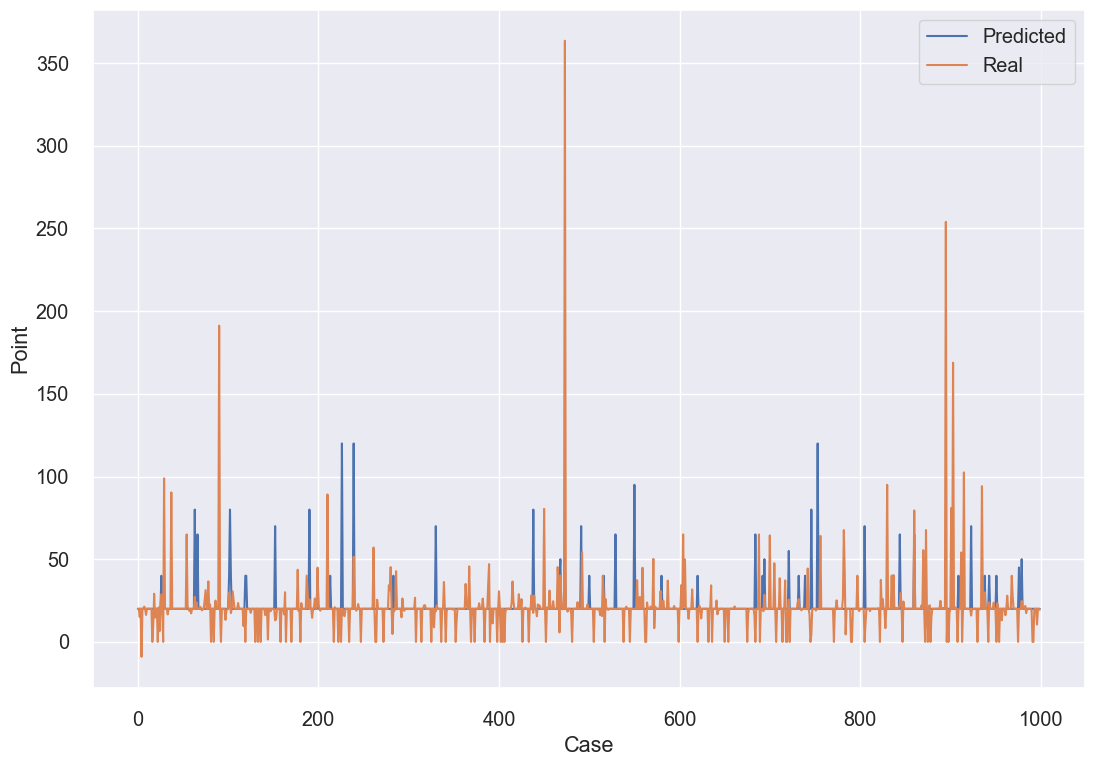

In [53]:
visualize_differences(pred_points=ubcf_pred_points,real_points=ubcf_real_points)

## Item-based collaborative filtering

In [54]:
#item-based
points_train_ib=points_train[:,[1,0,2]]
points_test_ib=points_test[:,[1,0,2]]

item_based_cf=CollaborativeFiltering(points_train_ib,k=3,item_based=True)
item_based_cf.fit()




In [55]:

IBCF_RMSE,IBCF_MSE,IBCF_MAE,ibcf_pred_points,ibcf_real_points=eval_cf(item_based_cf,points_test_ib,item_based=True)
print(f"Item-based CF, RMSE = {IBCF_RMSE}\n")
print(f"Item-based CF, MSE = {IBCF_MSE}\n")
print(f"Item-based CF, MAE = {IBCF_MAE}\n")


Item-based CF, RMSE = 19.45418496608288

Item-based CF, MSE = 378.46531269456517

Item-based CF, MAE = 5.813350254648313



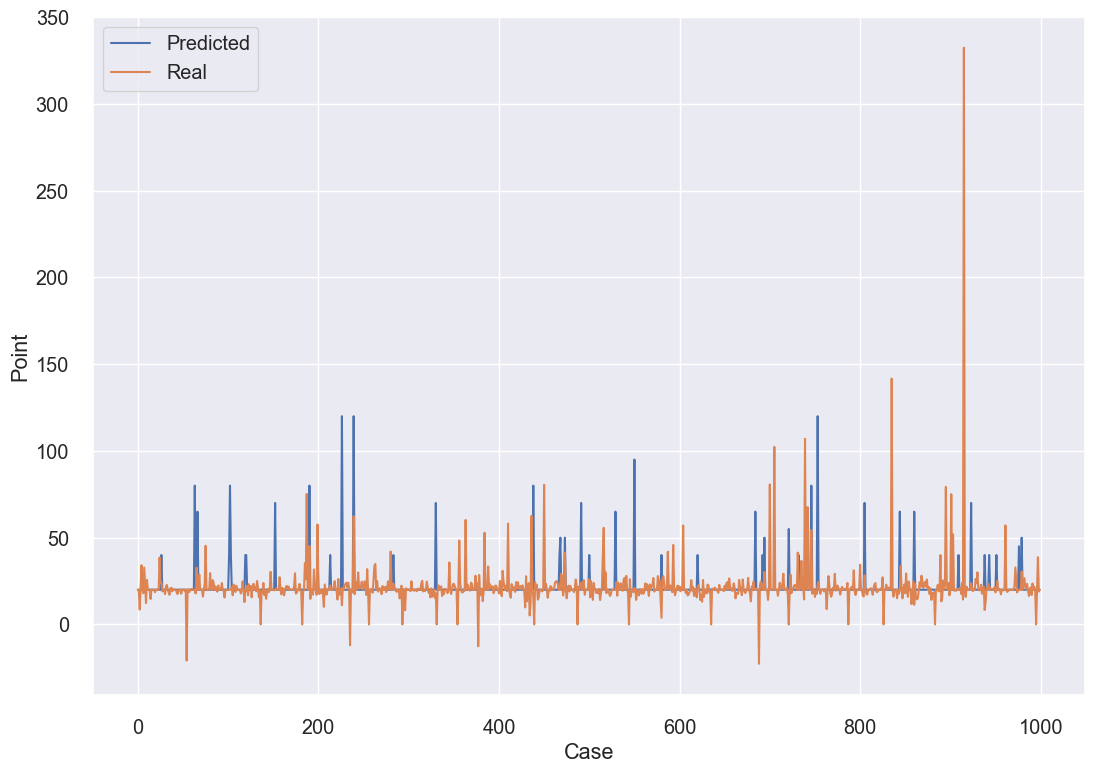

In [56]:
visualize_differences(pred_points=ibcf_pred_points,real_points=ibcf_real_points)

In [57]:
item_based_cf_recommedation_result=get_top_items(item_based_cf,user_id="006842a9-8da3-4e9a-9a23-68535983aee0",item_based=True)
print(item_based_cf_recommedation_result)

Top points:  [200.   200.   182.27 180.97 130.   125.   119.59]
748     84b248b0-1ee1-4f59-8b38-85dd951e6d6f
1016    fec4736b-4d6e-42f9-b52c-7de835b72b05
1978    9be3867b-e1dd-4995-8b7d-08f01e6b4456
1208    0259b078-ec96-4eb9-9e4b-87d934c14db4
3978    6b516020-f480-44d3-b70b-108d749eb257
623     84bb152c-b2b0-4cfc-9022-7645dcf724e5
1525    15853cc8-d1b2-4c24-bf92-f7b1bcbbb1bb
Name: item_id, dtype: object


# Matrix Factorization

In [58]:

class MF(object):
    """docstring for CF"""
    def __init__(self, Y_data, K,n_users,n_items, lam = 0.1, Xinit = None, Winit = None, 
                 learning_rate = 0.5, max_iter = 1000, print_every = 100, user_based = 1):
        self.Y_raw_data = Y_data
        self.K = K
        self.lam = lam
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.print_every = print_every
        self.user_based = user_based
        # number of users and items. Remember to add 1 since id starts from 0
        self.n_users = n_users
        self.n_items = n_items
        print(f"MF Initialize with n_users {n_users} and n_items {n_items}")
        self.X = np.random.randn(self.n_items, K).astype("float64") if Xinit is None else Xinit 
        print(f"X shape {self.X.shape}")
        self.W = np.random.randn(K, self.n_users).astype("float64") if Winit is None else Winit 
        print(f"W shape {self.W.shape}")

        self.n_ratings = Y_data.shape[0] # number of rating 
        # normalized data
        self.Y_data_n = self.Y_raw_data.copy()

    def normalize_Y(self):
        
        
        if self.user_based:
            user_col = 0
            item_col = 1
            n_objects = self.n_users
        else:
            user_col = 1
            item_col = 0 
            n_objects = self.n_items
        self.mu = np.zeros(n_objects)
#         self.Y_data_n = self.Y_raw_data
#         return
        users = self.Y_raw_data[:, user_col] 
        self.mu = np.zeros((n_objects,))
        for n in range(n_objects):
            # row indices of rating done by user n
            # since indices need to be integers, we need to convert
            ids = np.where(users == n)[0].astype(np.int32)
            # indices of all ratings associated with user n
            item_ids = self.Y_data_n[ids, item_col] 
            # and the corresponding ratings 
            ratings = self.Y_data_n[ids, 2]
            # take mean
            m = np.mean(ratings) 
            if np.isnan(m):
                m = 0 # to avoid empty array and nan value
            self.mu[n] = m
            # normalize
            self.Y_data_n[ids, 2] = ratings - self.mu[n]
            
    
    def loss(self):
        L = 0 
        for i in range(self.Y_data_n.shape[0]):
            # user, item, rating
            n, m, rate = int(self.Y_data_n[i, 0]), int(self.Y_data_n[i, 1]), self.Y_data_n[i, 2]
            L += 0.5*(rate - self.X[m, :].dot(self.W[:, n]))**2
            
        # regularization, don't ever forget this 
        L /= self.n_ratings
        L += 0.5*self.lam*(np.linalg.norm(self.X, 'fro') + np.linalg.norm(self.W, 'fro'))
        return L 

    
    def get_items_rated_by_user(self, user_id):
        """
        get all items which are rated by user n, and the corresponding ratings
        """
        # y = self.Y_data_n[:,0] # all users (may be duplicated)
        # item indices rated by user_id
        # we need to +1 to user_id since in the rate_matrix, id starts from 1 
        # while index in python starts from 0
        ids = np.where(self.Y_data_n[:,0] == user_id)[0] 
        item_ids, ratings = self.Y_data_n[ids, 1].astype(np.int32), self.Y_data_n[ids, 2]
        return (item_ids, ratings)
        
        
    def get_users_who_rate_item(self, item_id):
        """
        get all users who rated item m and get the corresponding ratings
        """
        ids = np.where(self.Y_data_n[:,1] == item_id)[0] 
        user_ids, ratings = self.Y_data_n[ids, 0].astype(np.int32), self.Y_data_n[ids, 2]
        return (user_ids, ratings)
        
    def updateX(self):
        for m in range(self.n_items):
            user_ids, ratings = self.get_users_who_rate_item(m)
            if len(user_ids)==0 or len(ratings)==0:
                continue
            Wm = self.W[:, user_ids]
            grad_xm = -1*(ratings - self.X[m, :].dot(Wm)).dot(Wm.T)/self.n_ratings + \
                                               self.lam*self.X[m, :]
            self.X[m, :] = self.learning_rate*grad_xm.reshape((self.K,)).astype("float64")
    
    def updateW(self):
        for n in range(self.n_users):
            item_ids, ratings = self.get_items_rated_by_user(n)
            if len(item_ids)==0 or len(ratings)==0:
                continue
            Xn = self.X[item_ids, :]
            grad_wn = -1*Xn.T.dot(ratings - Xn.dot(self.W[:, n]))/self.n_ratings + \
                        self.lam*self.W[:, n]
            self.W[:, n] -= self.learning_rate*grad_wn.reshape((self.K,)).astype("float64")
    
    def fit(self):
        self.normalize_Y()
        for it in range(self.max_iter):
            self.updateX()
            self.updateW()
            if (it + 1) % self.print_every == 0:
                rmse_train,mse,mae,_,__ = self.evaluate(self.Y_raw_data)
                print ('iter =', it + 1, ', loss =', self.loss(), ', RMSE train =', rmse_train)
    
    
    def pred(self, u, i):
        """ 
        predict the rating of user u for item i 
        if you need the un
        """
        u = int(u)
        i = int(i)
        
        if self.user_based:
            bias = self.mu[u]
        else: 
            bias = self.mu[i]
        pred = self.X[i, :].dot(self.W[:, u]) + bias 
        return pred 
        
    
    def pred_for_user(self, user_id):
        ids = np.where(self.Y_data_n[:, 0] == user_id)[0]
        items_rated_by_u = self.Y_data_n[ids, 1].tolist()              
        
        y_pred = self.X.dot(self.W[:, user_id]) + self.mu[user_id]
        predicted_ratings= []
        for i in range(self.n_items):
            if i not in items_rated_by_u:
                predicted_ratings.append((i, y_pred[i]))
        
        return predicted_ratings
    
    def evaluate(self, rate_test):
        n_tests = rate_test.shape[0]
        SE = 0 # squared error
        pred_points=[]
        real_points=[]
        for n in range(n_tests):
            pred = self.pred(rate_test[n, 0], rate_test[n, 1])
            SE += (pred - rate_test[n, 2])**2 
            pred_points.append(pred)
            real_points.append(rate_test[n, 2])
        RMSE = np.sqrt(SE/n_tests)
        MSE=SE/n_tests
        MAE=mean_absolute_error(pred_points,real_points)
        return RMSE,MSE,MAE, pred_points,real_points
        

In [59]:
def preprocess(raw_data,user_based=True):
    result=raw_data.copy()
    for index,row in list(enumerate(raw_data)):
        point=row[2]
        if user_based:
            user_id=row[0]
            item_id=row[1]
            result[index]=[user_id_nums[user_id],item_id_nums[item_id],point]      
        else:
            user_id=row[1]
            item_id=row[0]
            result[index]=[item_id_nums[item_id],user_id_nums[user_id],point]    

    return result

## User-based Matrix Factorization

In [60]:
ratings =preprocess(point_matrix,user_based=True) 


rate_train, rate_test = train_test_split(ratings, test_size=0.33, random_state=42)
n_items=int(np.max(ratings[:, 1])) + 1
n_users=int(np.max(ratings[:, 0])) + 1
rs = MF(rate_train, K = 2, lam = 0.1, n_items=n_items,n_users=n_users,print_every = 2, learning_rate = 0.001, max_iter = 10, user_based = 1)
rs.fit()


MF Initialize with n_users 16880 and n_items 4051
X shape (4051, 2)
W shape (2, 16880)


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in long_scalars
  ret = ret / rcount


iter = 2 , loss = 99.44037870322617 , RMSE train = 13.330681133989682
iter = 4 , loss = 99.43880655641671 , RMSE train = 13.330681133808111
iter = 6 , loss = 99.43723477096653 , RMSE train = 13.330681133644335
iter = 8 , loss = 99.4356633465727 , RMSE train = 13.330681133480653
iter = 10 , loss = 99.43409228316784 , RMSE train = 13.330681133317045
User-based MF, RMSE = 19.905112349947352
User-based MF, MSE = 396.2134976640266
User-based MF, MAE = 5.72631861832449


In [91]:
# evaluate on test data
UBMF_RMSE,UBMF_MSE,UBMF_MAE,ub_mf_pred_points,ub_mf_real_points = rs.evaluate(rate_test)
print ('User-based MF, RMSE =', UBMF_RMSE)
print ('User-based MF, MSE =', UBMF_MSE)
print ('User-based MF, MAE =', UBMF_MAE)

User-based MF, RMSE = 19.905112349947352
User-based MF, MSE = 396.2134976640266
User-based MF, MAE = 5.72631861832449


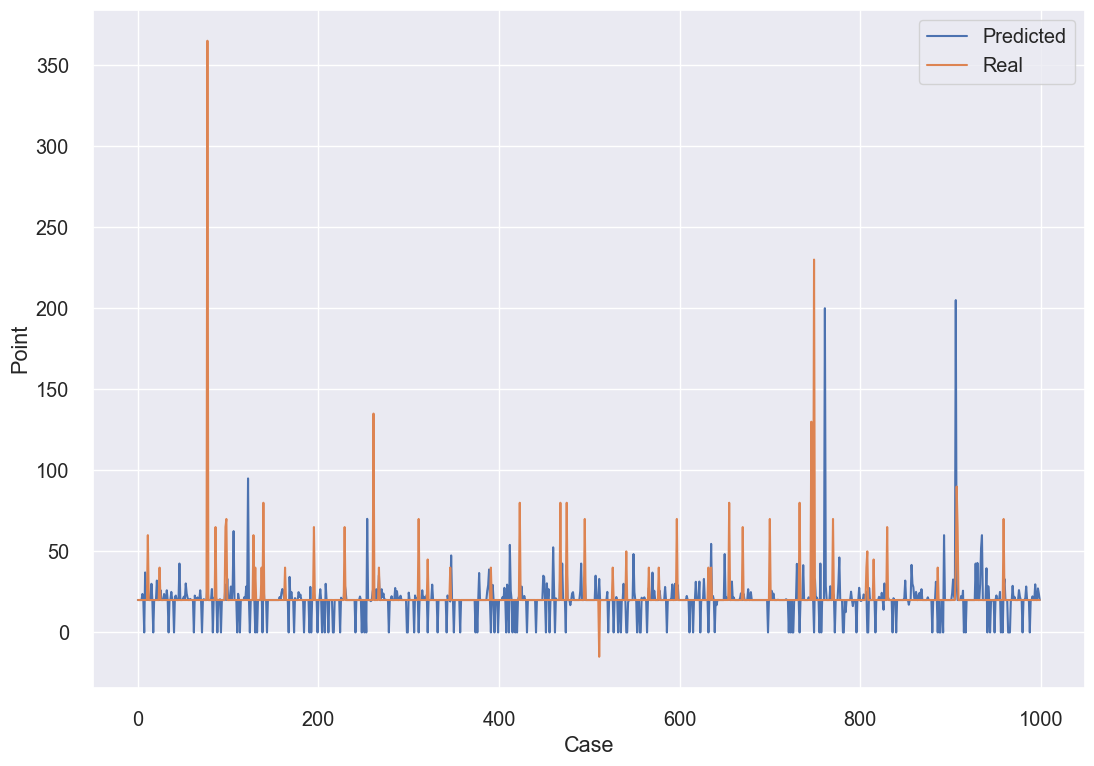

In [61]:
visualize_differences(pred_points=ub_mf_pred_points,real_points=ub_mf_real_points)

In [62]:
def mf_get_top_items(cf_model,user_id,n_top_items=7,item_based=False):
    pred_points=np.array([],dtype="float64")
    for item_id in home_orig_cleaned.item_id.values:
        if not item_based:
            left_param=user_id_nums.get(user_id)
            right_param=item_id_nums.get(item_id)
        else:
            right_param=user_id_nums.get(user_id)
            left_param=item_id_nums.get(item_id)

        if left_param == None or right_param == None:
            continue
        pred=cf_model.pred(left_param,right_param)
        pred_points=np.append(pred_points,pred)
    top_item_indexes=np.argpartition(pred_points, -n_top_items)[-n_top_items:]
    top_item_indexes_sorted=top_item_indexes[np.argsort(pred_points[top_item_indexes])][::-1]
    print("Top points: ",pred_points[top_item_indexes_sorted])
    return home_orig_cleaned.iloc[top_item_indexes_sorted].item_id

In [63]:
mf_get_top_items(rs,"006842a9-8da3-4e9a-9a23-68535983aee0")

Top points:  [23.41 22.85 22.78 22.33 22.22 22.13 22.08]


2283    c65db9b4-11c6-4c55-bc82-bb49c999292c
1842    33214b34-f6b7-40be-8fd7-08fe6f705734
2972    07930b87-60f1-476c-9ff7-89f302d865bf
1469    001c2f7e-757e-44b5-beb7-96228fdec3c4
111     26f00eb4-f8f5-4f8f-9073-cd2d8b277dbf
1016    fec4736b-4d6e-42f9-b52c-7de835b72b05
1685    1bb02bc1-362b-4b1b-b9f9-e9005237e720
Name: item_id, dtype: object

## Item-based Matrix Factorization

In [64]:
#item-based
rate_train_ib=rate_train[:,[1,0,2]]
rate_test_ib=rate_test[:,[1,0,2]]


rs_ib = MF(rate_train_ib, K = 2, lam = 0.1, print_every = 2,  n_items=n_users,n_users=n_items,learning_rate = 0.5, max_iter = 10, user_based = 0)
rs_ib.fit()


MF Initialize with n_users 4051 and n_items 16880
X shape (16880, 2)
W shape (2, 4051)


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in long_scalars
  ret = ret / rcount


iter = 2 , loss = 96.51611331655327 , RMSE train = 13.330857737792849
iter = 4 , loss = 96.15617709079733 , RMSE train = 13.330838792387432
iter = 6 , loss = 95.83538175797244 , RMSE train = 13.330809494759968
iter = 8 , loss = 95.55030773687686 , RMSE train = 13.330785601850943
iter = 10 , loss = 95.2977018170491 , RMSE train = 13.330766142560085


In [65]:
IBMF_RMSE,IBMF_MSE,IBMF_MAE,ib_mf_pred_points,ib_mf_real_points = rs_ib.evaluate(rate_test_ib)
print ('Item-based MF, RMSE =', IBMF_RMSE)
print ('Item-based MF, MSE =', IBMF_MSE)
print ('Item-based MF, MAE =', IBMF_MAE)


Item-based MF, RMSE = 19.899796967912348
Item-based MF, MSE = 396.0019193641335
Item-based MF, MAE = 5.716215487768936


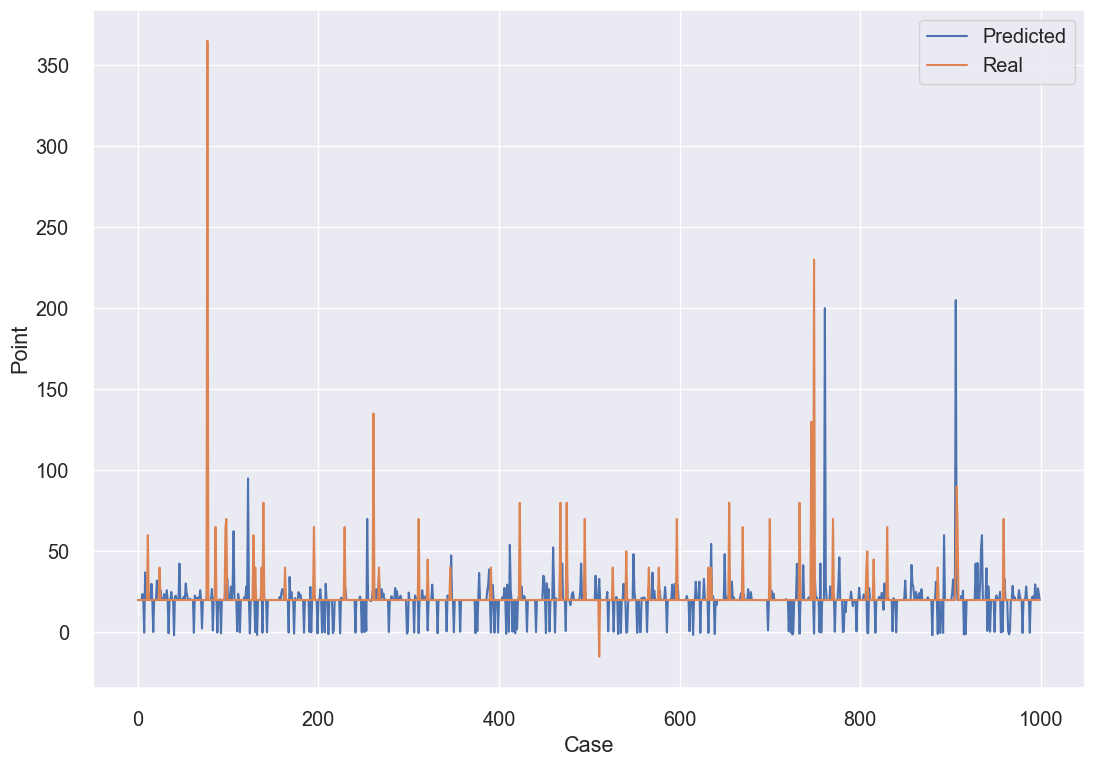

In [66]:
visualize_differences(pred_points=ib_mf_pred_points,real_points=ib_mf_real_points)


In [67]:
mf_get_top_items(rs_ib,"006842a9-8da3-4e9a-9a23-68535983aee0")


Top points:  [200.   181.25 170.   133.34 120.   120.   120.  ]


3443    e9d61c2d-1eb2-4745-8fbd-584d027f0643
3451    622d7653-db28-445d-949c-68c34ebd0703
3175    eb94ec1b-3176-4f09-8808-2d11f13b072d
3196    2c2b438b-3eb8-4b66-9c4d-bb2beb2d1558
1668    db0b32e6-5bef-48ff-b4f3-3685e55efd1c
3741    c46340b1-3260-49bb-be07-c7929fbbd4b6
3179    d7976e42-7fd8-4e78-9313-135de9f49e0d
Name: item_id, dtype: object

# Metrics

<BarContainer object of 5 artists>

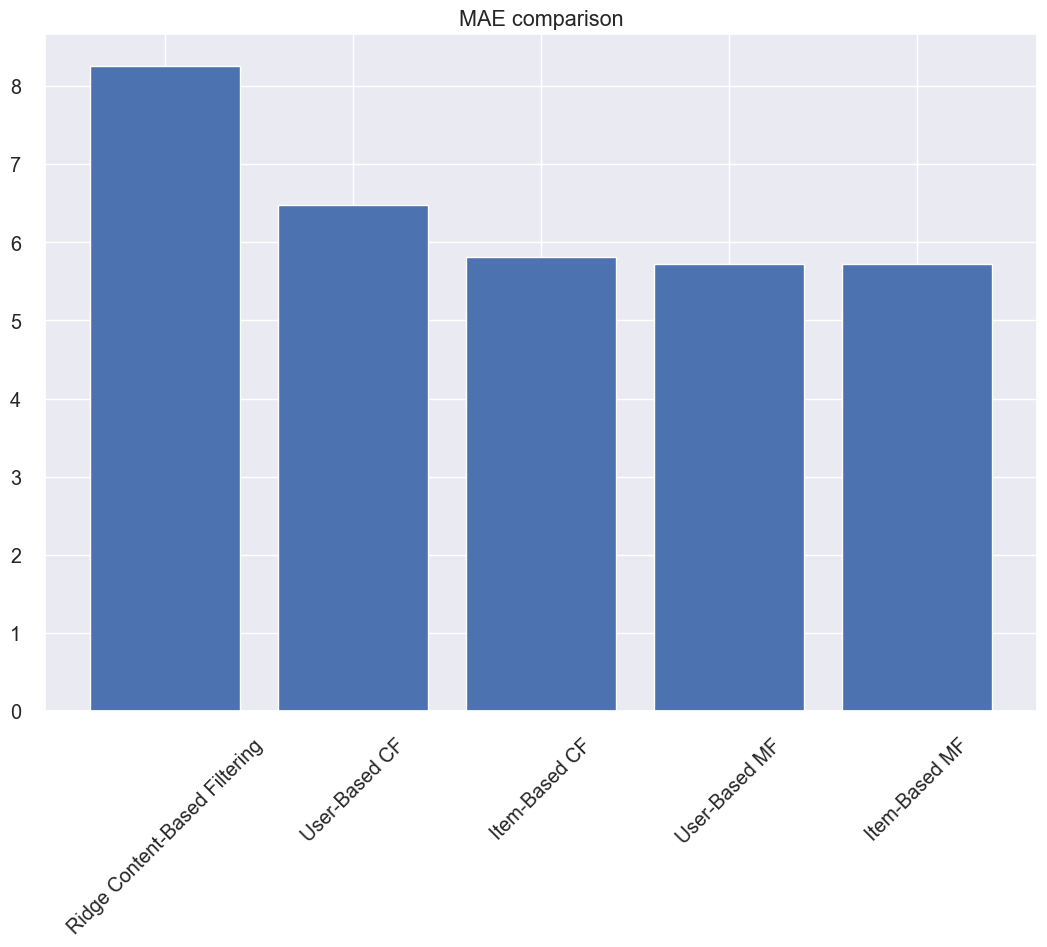

In [92]:
"""MAE"""
x_metrics=["Ridge Content-Based Filtering","User-Based CF","Item-Based CF","User-Based MF","Item-Based MF"]

MAEs=[CB_MAE,UBCF_MAE,IBCF_MAE,UBMF_MAE,IBMF_MAE,]
plt.xticks(rotation=45)
plt.title("MAE comparison")
plt.bar(x=x_metrics,height=MAEs)

<BarContainer object of 5 artists>

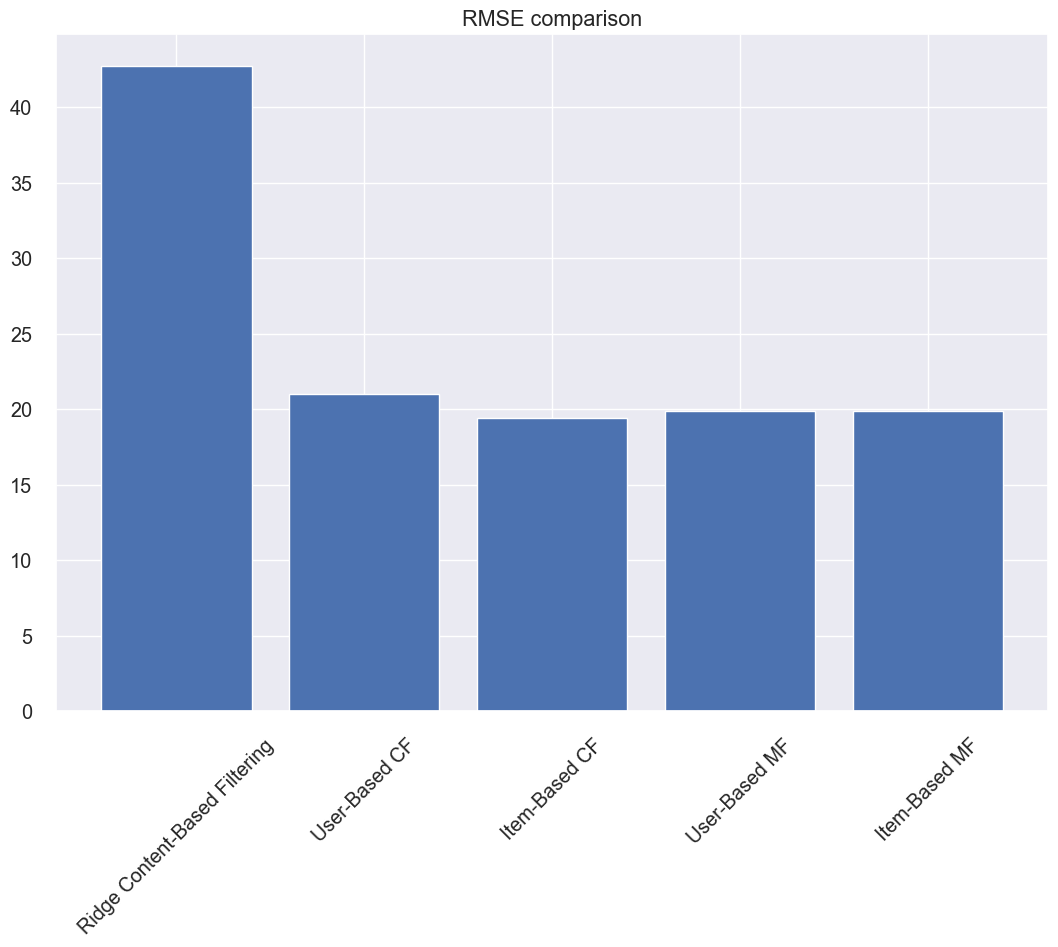

In [93]:
"""RMSE"""
RMSEs=[CB_RMSE,UBCF_RMSE,IBCF_RMSE,UBMF_RMSE,IBMF_RMSE,]
plt.xticks(rotation=45)
plt.title("RMSE comparison")
plt.bar(x=x_metrics,height=RMSEs)

<BarContainer object of 5 artists>

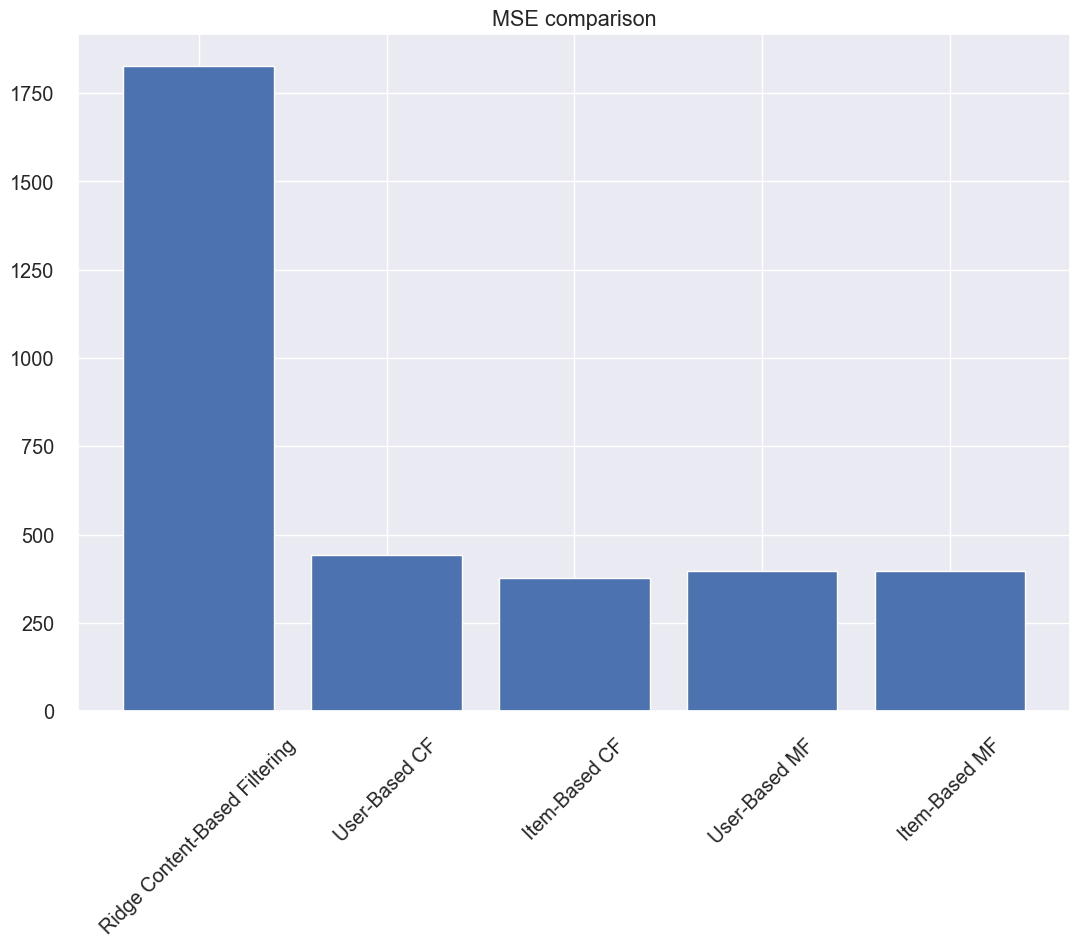

In [94]:
"""MSE"""
MSEs=[CB_MSE,UBCF_MSE,IBCF_MSE,UBMF_MSE,IBMF_MSE,]
plt.xticks(rotation=45)
plt.title("MSE comparison")
plt.bar(x=x_metrics,height=MSEs)

In [95]:
"Metrics DF"
metrics_data=[MAEs,RMSEs,MSEs]
metrics_indexes=["MAE","RMSE","MSE"]
metrics_df=pd.DataFrame(metrics_data,columns=x_metrics,index=metrics_indexes)
metrics_df.reset_index()
metrics_df.head()

,Ridge Content-Based Filtering,User-Based CF,Item-Based CF,User-Based MF,Item-Based MF
MAE,8.257296,6.473138,5.813350,5.726319,5.716215
RMSE,42.741230,21.036909,19.454185,19.905112,19.899797
MSE,1826.812759,442.551558,378.465313,396.213498,396.001919


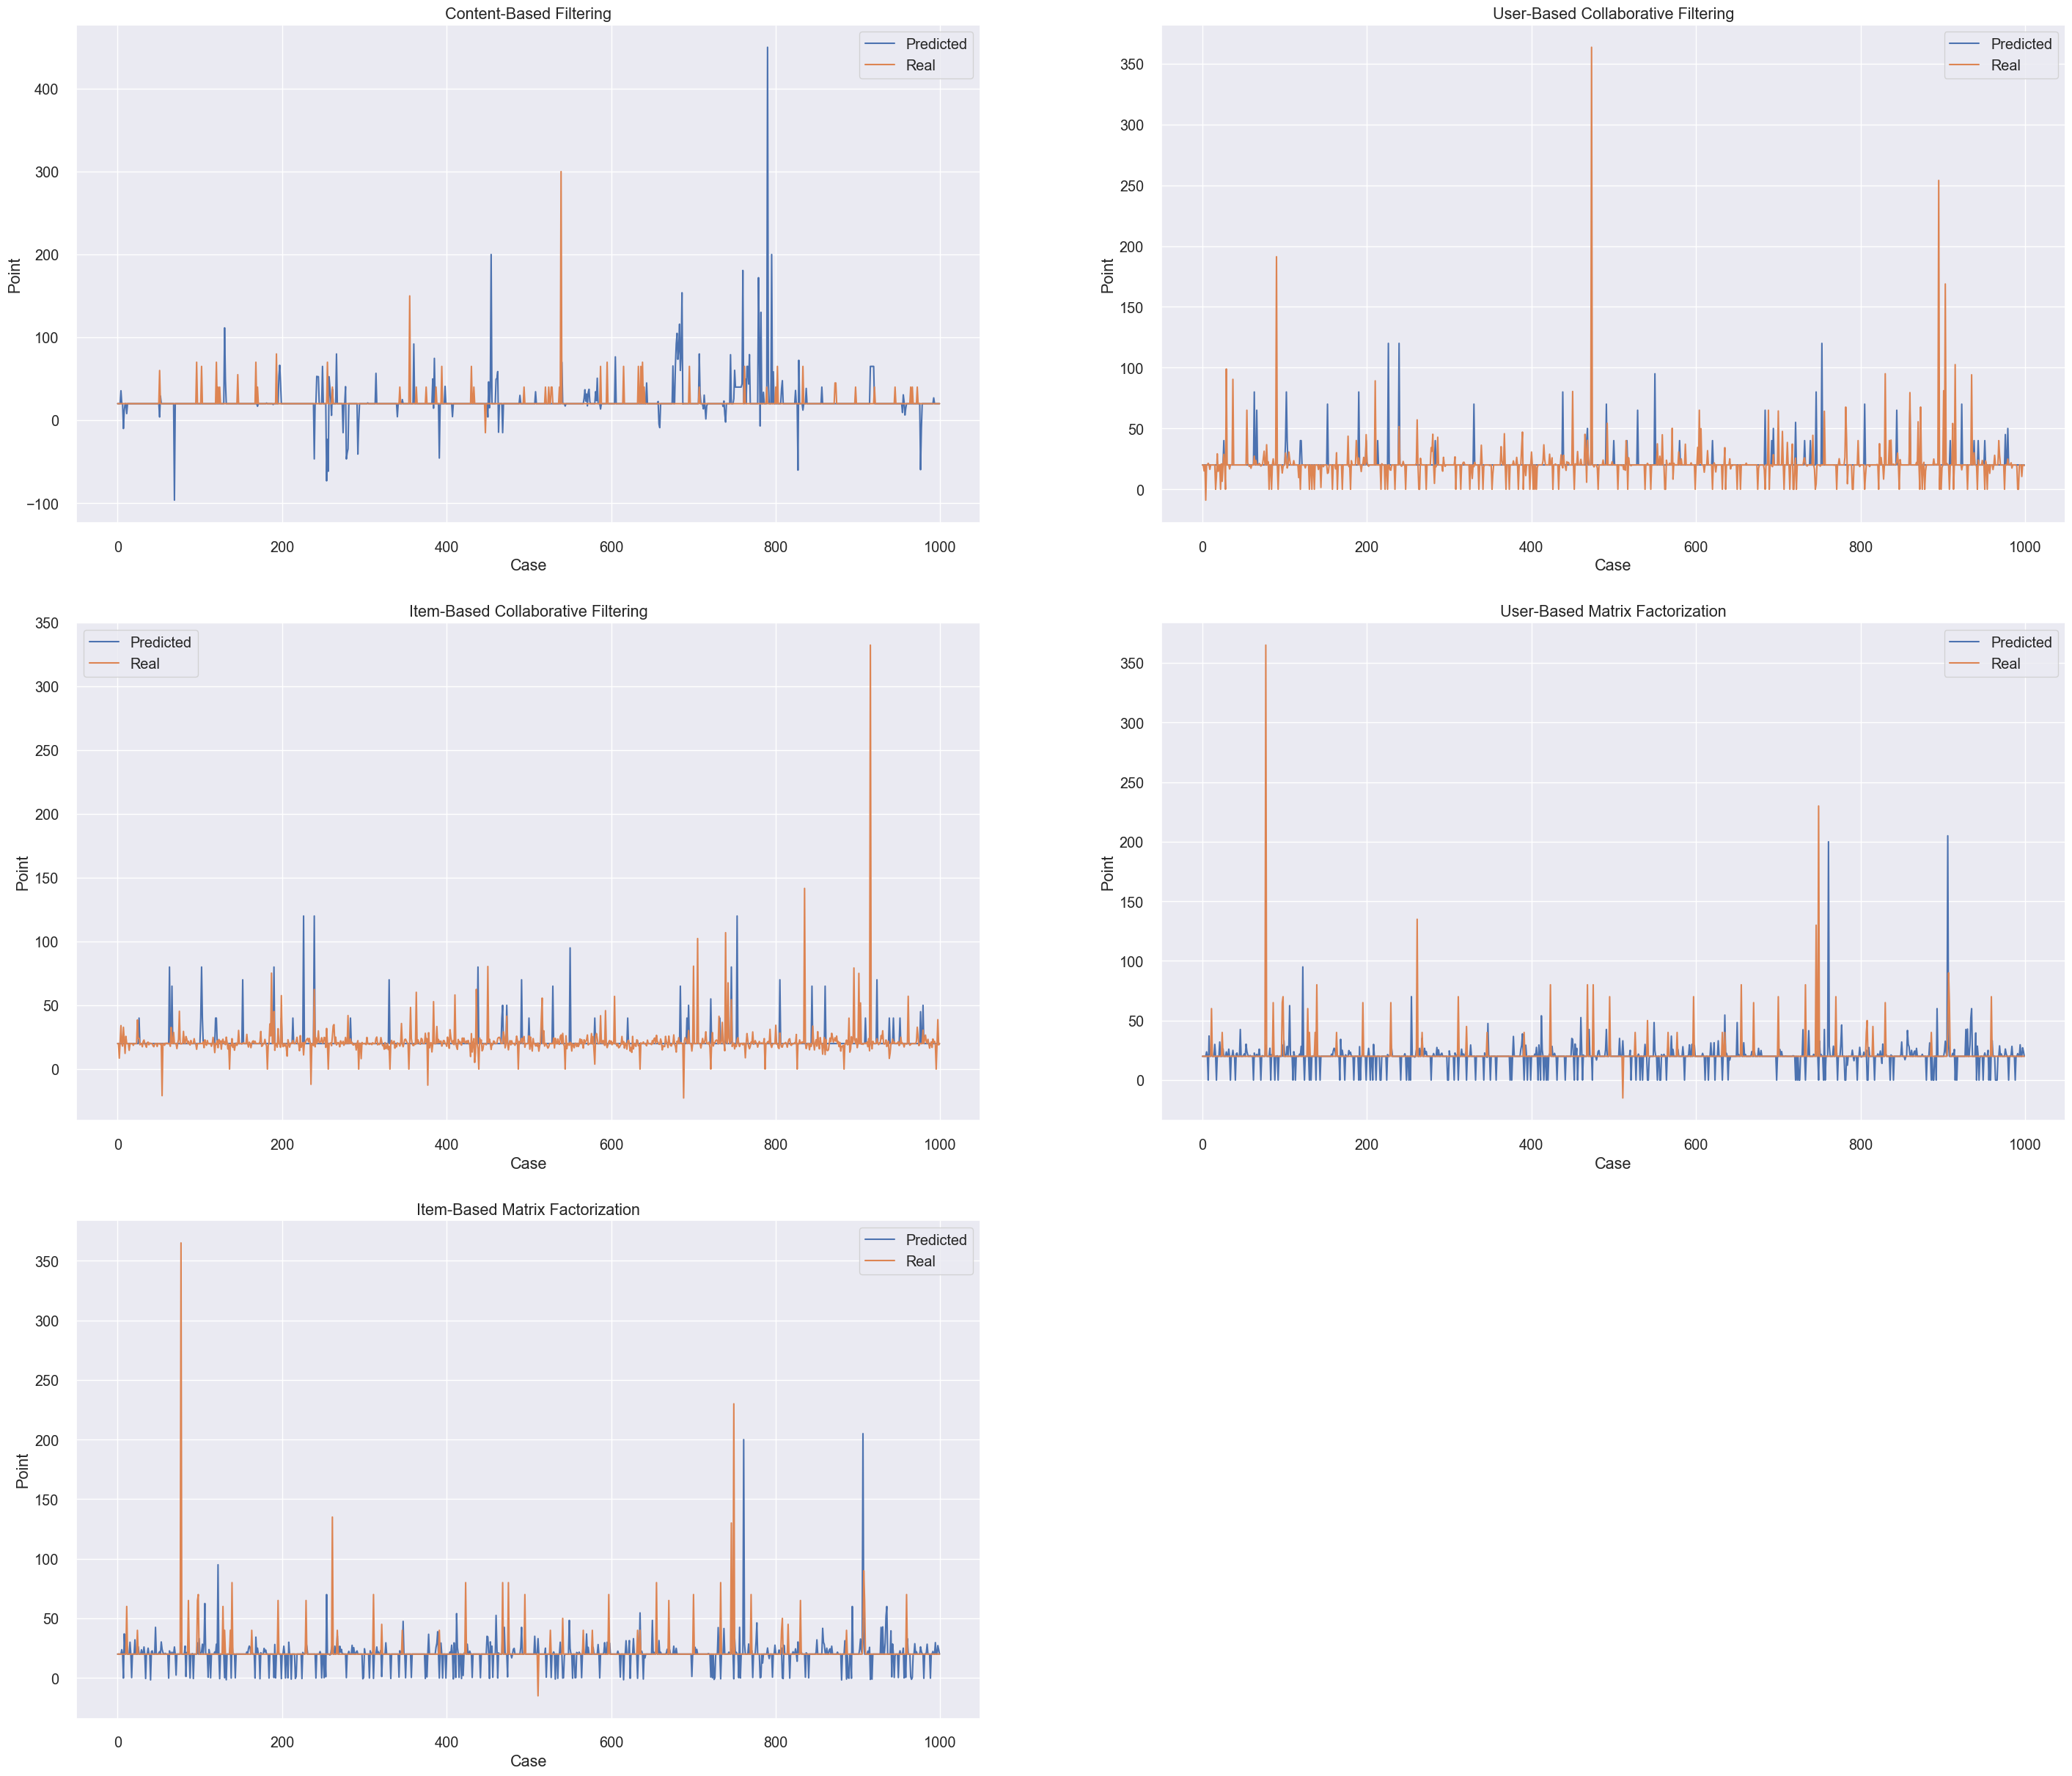

In [96]:
"visualization comparison"
fig, axes=plt.subplots(nrows=3,ncols=2,figsize=(35,30))
visualize_differences(pred_points=cb_pred_points,real_points=cb_real_points,fig=axes[0,0],title="Content-Based Filtering")
visualize_differences(pred_points=ubcf_pred_points,real_points=ubcf_real_points,fig=axes[0,1],title="User-Based Collaborative Filtering")
visualize_differences(pred_points=ibcf_pred_points,real_points=ibcf_real_points,fig=axes[1,0],title="Item-Based Collaborative Filtering")
visualize_differences(pred_points=ub_mf_pred_points,real_points=ub_mf_real_points,fig=axes[1,1],title="User-Based Matrix Factorization")
visualize_differences(pred_points=ib_mf_pred_points,real_points=ib_mf_real_points,fig=axes[2,0],title="Item-Based Matrix Factorization")
axes[-1, -1].axis('off')

plt.show()



